# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [333]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

import os
os.environ['OMP_NUM_THREADS'] = '2'


## Reading the Dataset

In [334]:
# loading the dataset
data = pd.read_csv("C:\\Users\\Rucha\\Documents\\DSBA Practice\\Unsupervised learning\\Unsupervised_Project\\stock_data.csv")

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [335]:
data.shape

(340, 15)

* The dataset has 340 rows and 15 columns

### Displaying few rows of the dataset

In [336]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Creating a copy of original data

In [337]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations**

- *GICS Sector*, *Security*, *GICS Sub industry* , * Company/ Security * are categorical variables with 340 levels.
- The other 11 variables are of numerical datatype *int* (integer)and float.

### Statistical summary of the dataset

In [339]:
df.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


**Observations**
* The median value of share price is 60 which is much less than max price of shares indicating 50% of the securities are cheap.
* Almost 75% of the stocks have a low P/E ratio of 31 indicating favorable condition for the traders.
* The maximum EPS among all companies is 50 but it is not the only factor to consider while purchasing a security.
* The median Volatility is low for the securities indicating 50% of the stocks are having low risk.
* The max ROE for the securities is 917 which can be favorable to invest for traders considering other financial aspects as well for the security.

In [340]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


**Observations**

- The American Airlines Group is the most popular security in the given dataset
- Industrials economic sector and more specifically Oil and Gas Exploration and Production sub-industry group is more popular among the investors as compared to other economic sector.


### Checking for missing values

In [341]:
# checking for missing values
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observations**
- There are no missing values in our data

In [342]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observations**
- There are no missing values in our data

### Checking for duplicate entries

In [343]:
# let's check for duplicate observations
df.duplicated().sum()

0

- There are no duplicate observations.

In [344]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Ticker Symbol' are 

 ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME'
 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FE'
 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP'
 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN'
 'HCP' 'HE

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

In [345]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [346]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [347]:
df.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


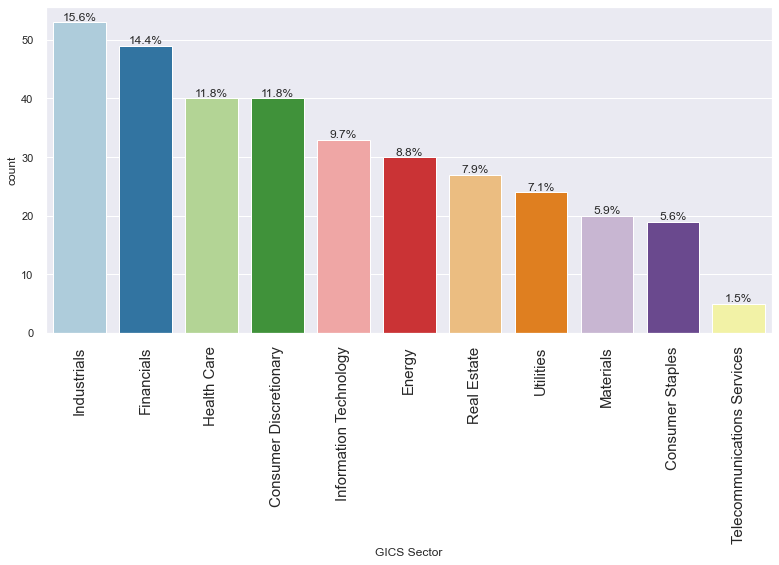

In [348]:
labeled_barplot(df, 'GICS Sector', perc=True)

**Observations**
- In the given dataset, the information about Industrials GICS sector stocks is more (15.6%) while the informartion about  stocks from Telecommunications services is the least. 

In [349]:
df.groupby(['GICS Sector']).count()

,Ticker Symbol,Security,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
GICS Sector,,,,,,,,,,,,,,
Consumer Discretionary,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Consumer Staples,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Energy,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Financials,49,49,49,49,49,49,49,49,49,49,49,49,49,49
Health Care,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Industrials,53,53,53,53,53,53,53,53,53,53,53,53,53,53
Information Technology,33,33,33,33,33,33,33,33,33,33,33,33,33,33
Materials,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Real Estate,27,27,27,27,27,27,27,27,27,27,27,27,27,27


In [350]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

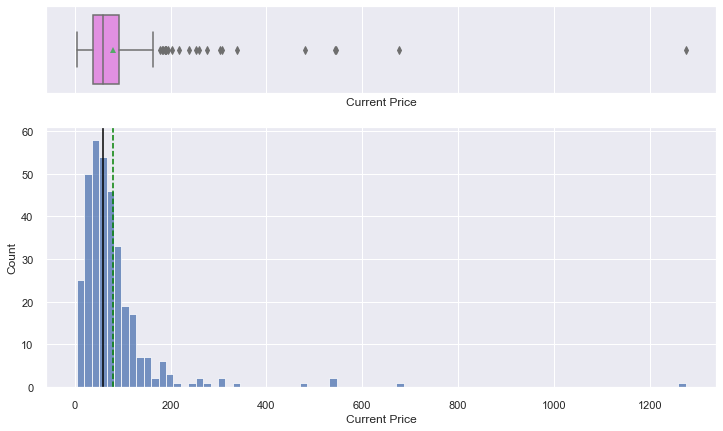

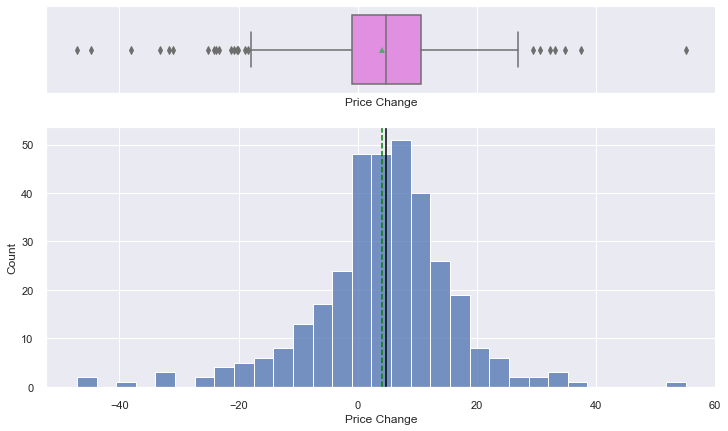

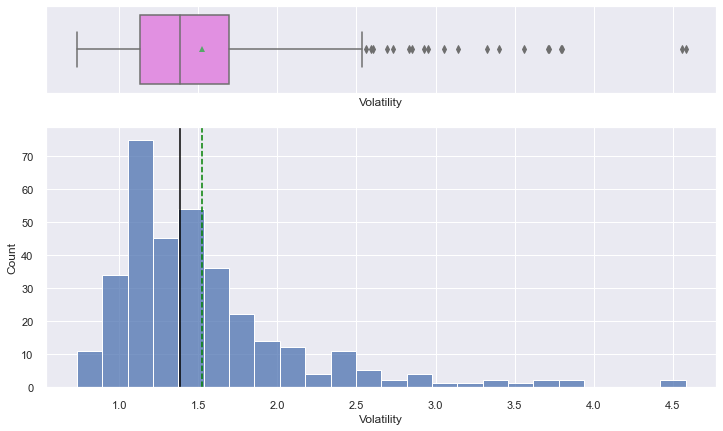

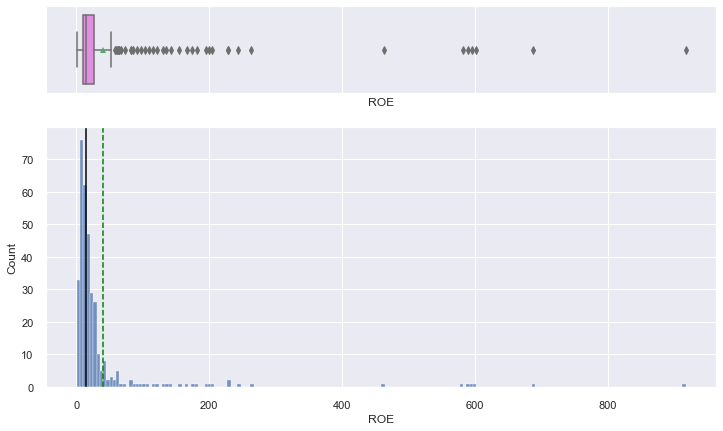

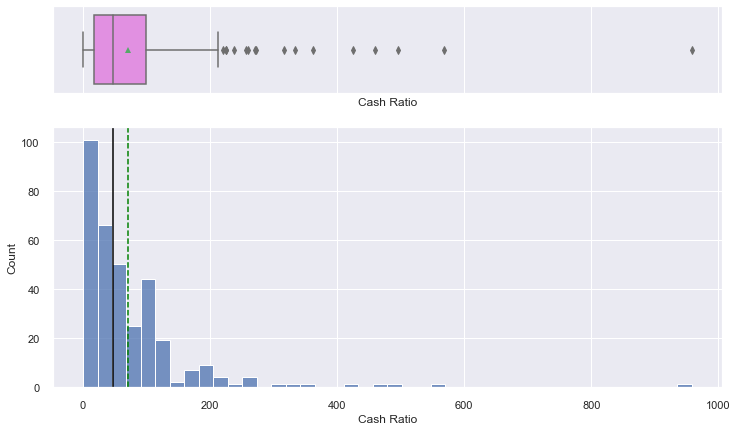

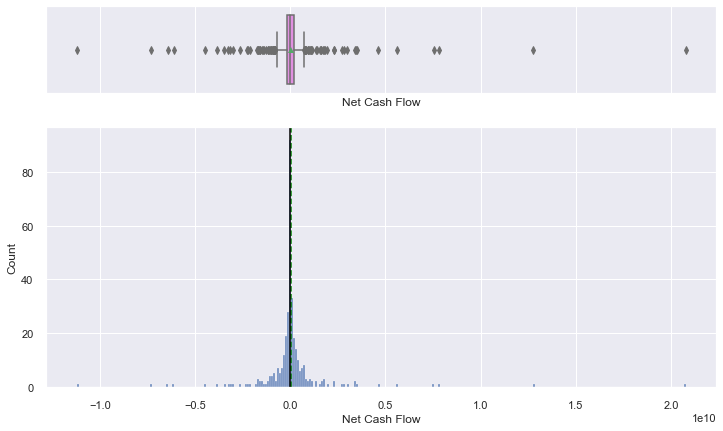

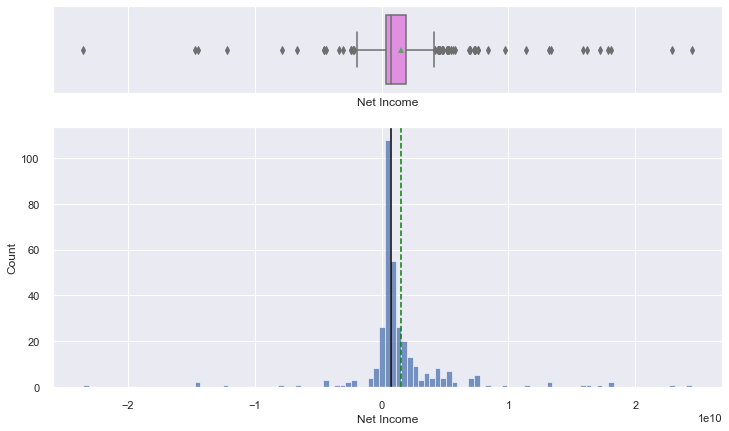

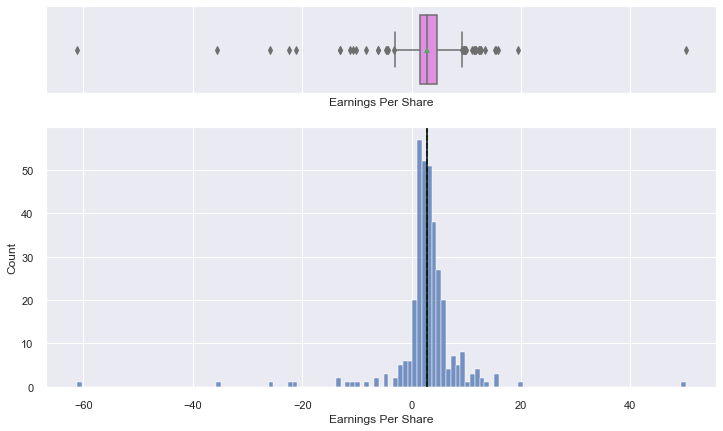

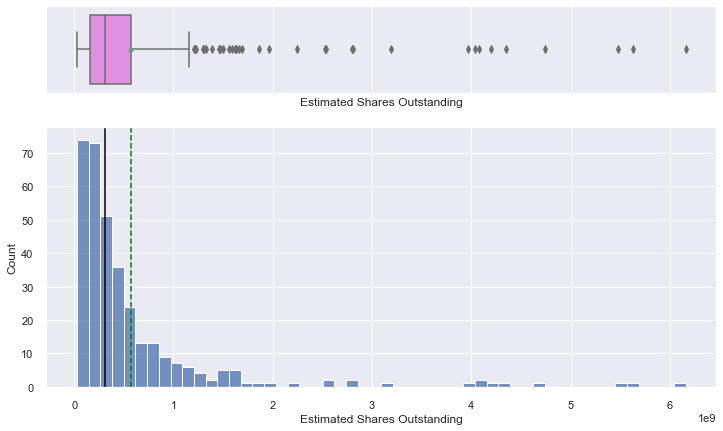

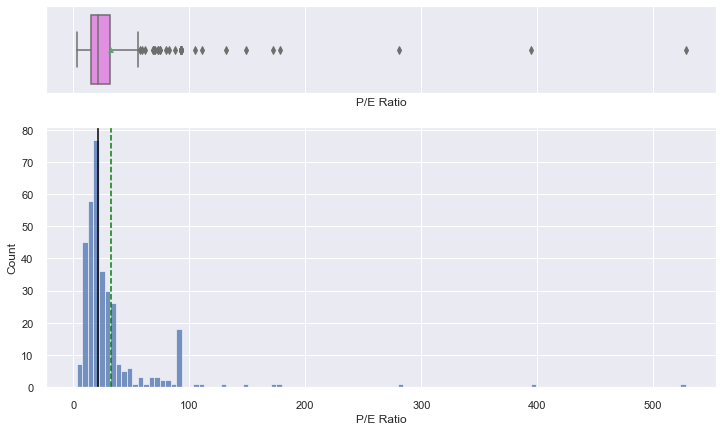

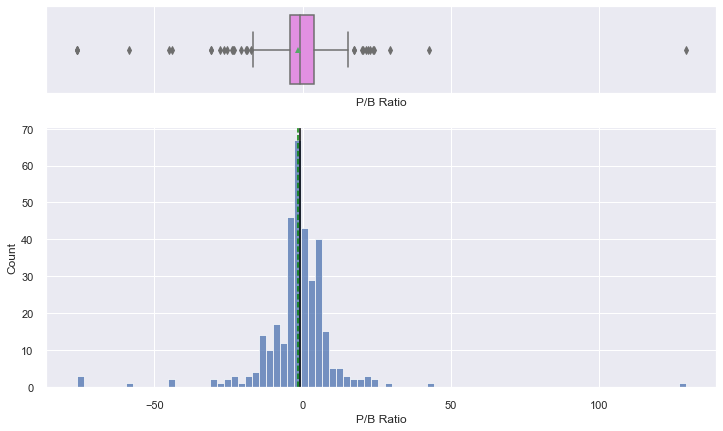

In [351]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**
* The distribution of Current Price of stocks is heavily right-skewed indicating that some of the stocks are very expensive.
* The distribution of Price change is normally distributed with some outliers.
* The distribution of P/B ratio is normally distributed with some outliers
* The distribution of P/E ratio is heavily right skewed
* The distribution of Volatility, ROE and cash ratio is right skewed

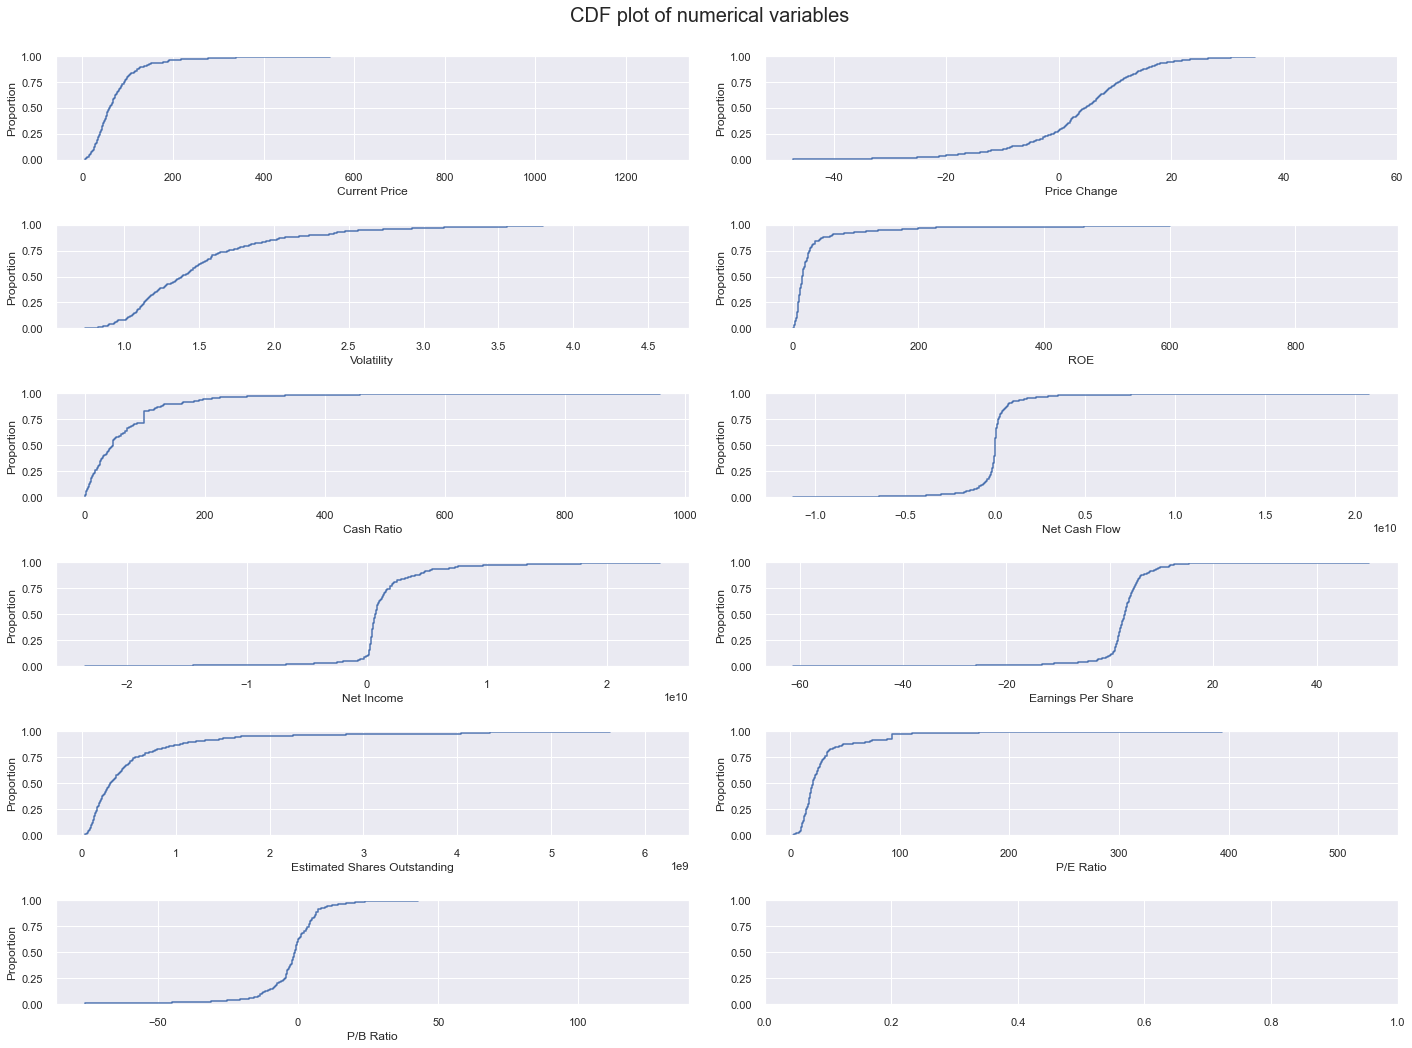

In [352]:
fig, axes = plt.subplots(6, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
- The distribution of current price is heavily right skewed indicating some of the stock prices are way expensive than others


### Bivariate Analsysis

#### Let's check for correlations

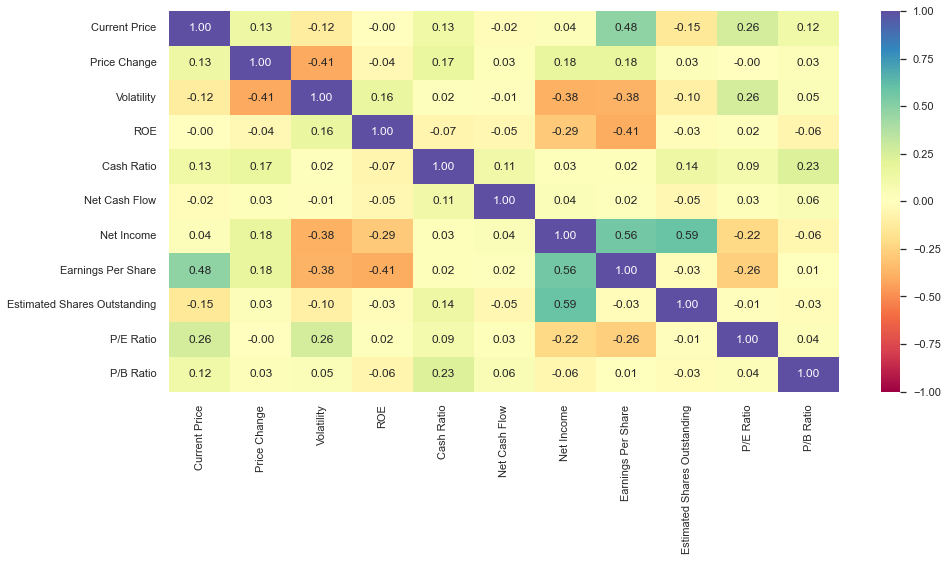

In [353]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**

- Net income for securities is moderately positively correlated with the Estimated Shares Outstanding.
- Net income for securities is moderately positively correlated with Earnings Per Share-
- Current Price for securities is moderatley positively correlated with Earnings per share
- P/E Ratio is weakly negatively correlated with Earnings per Share.

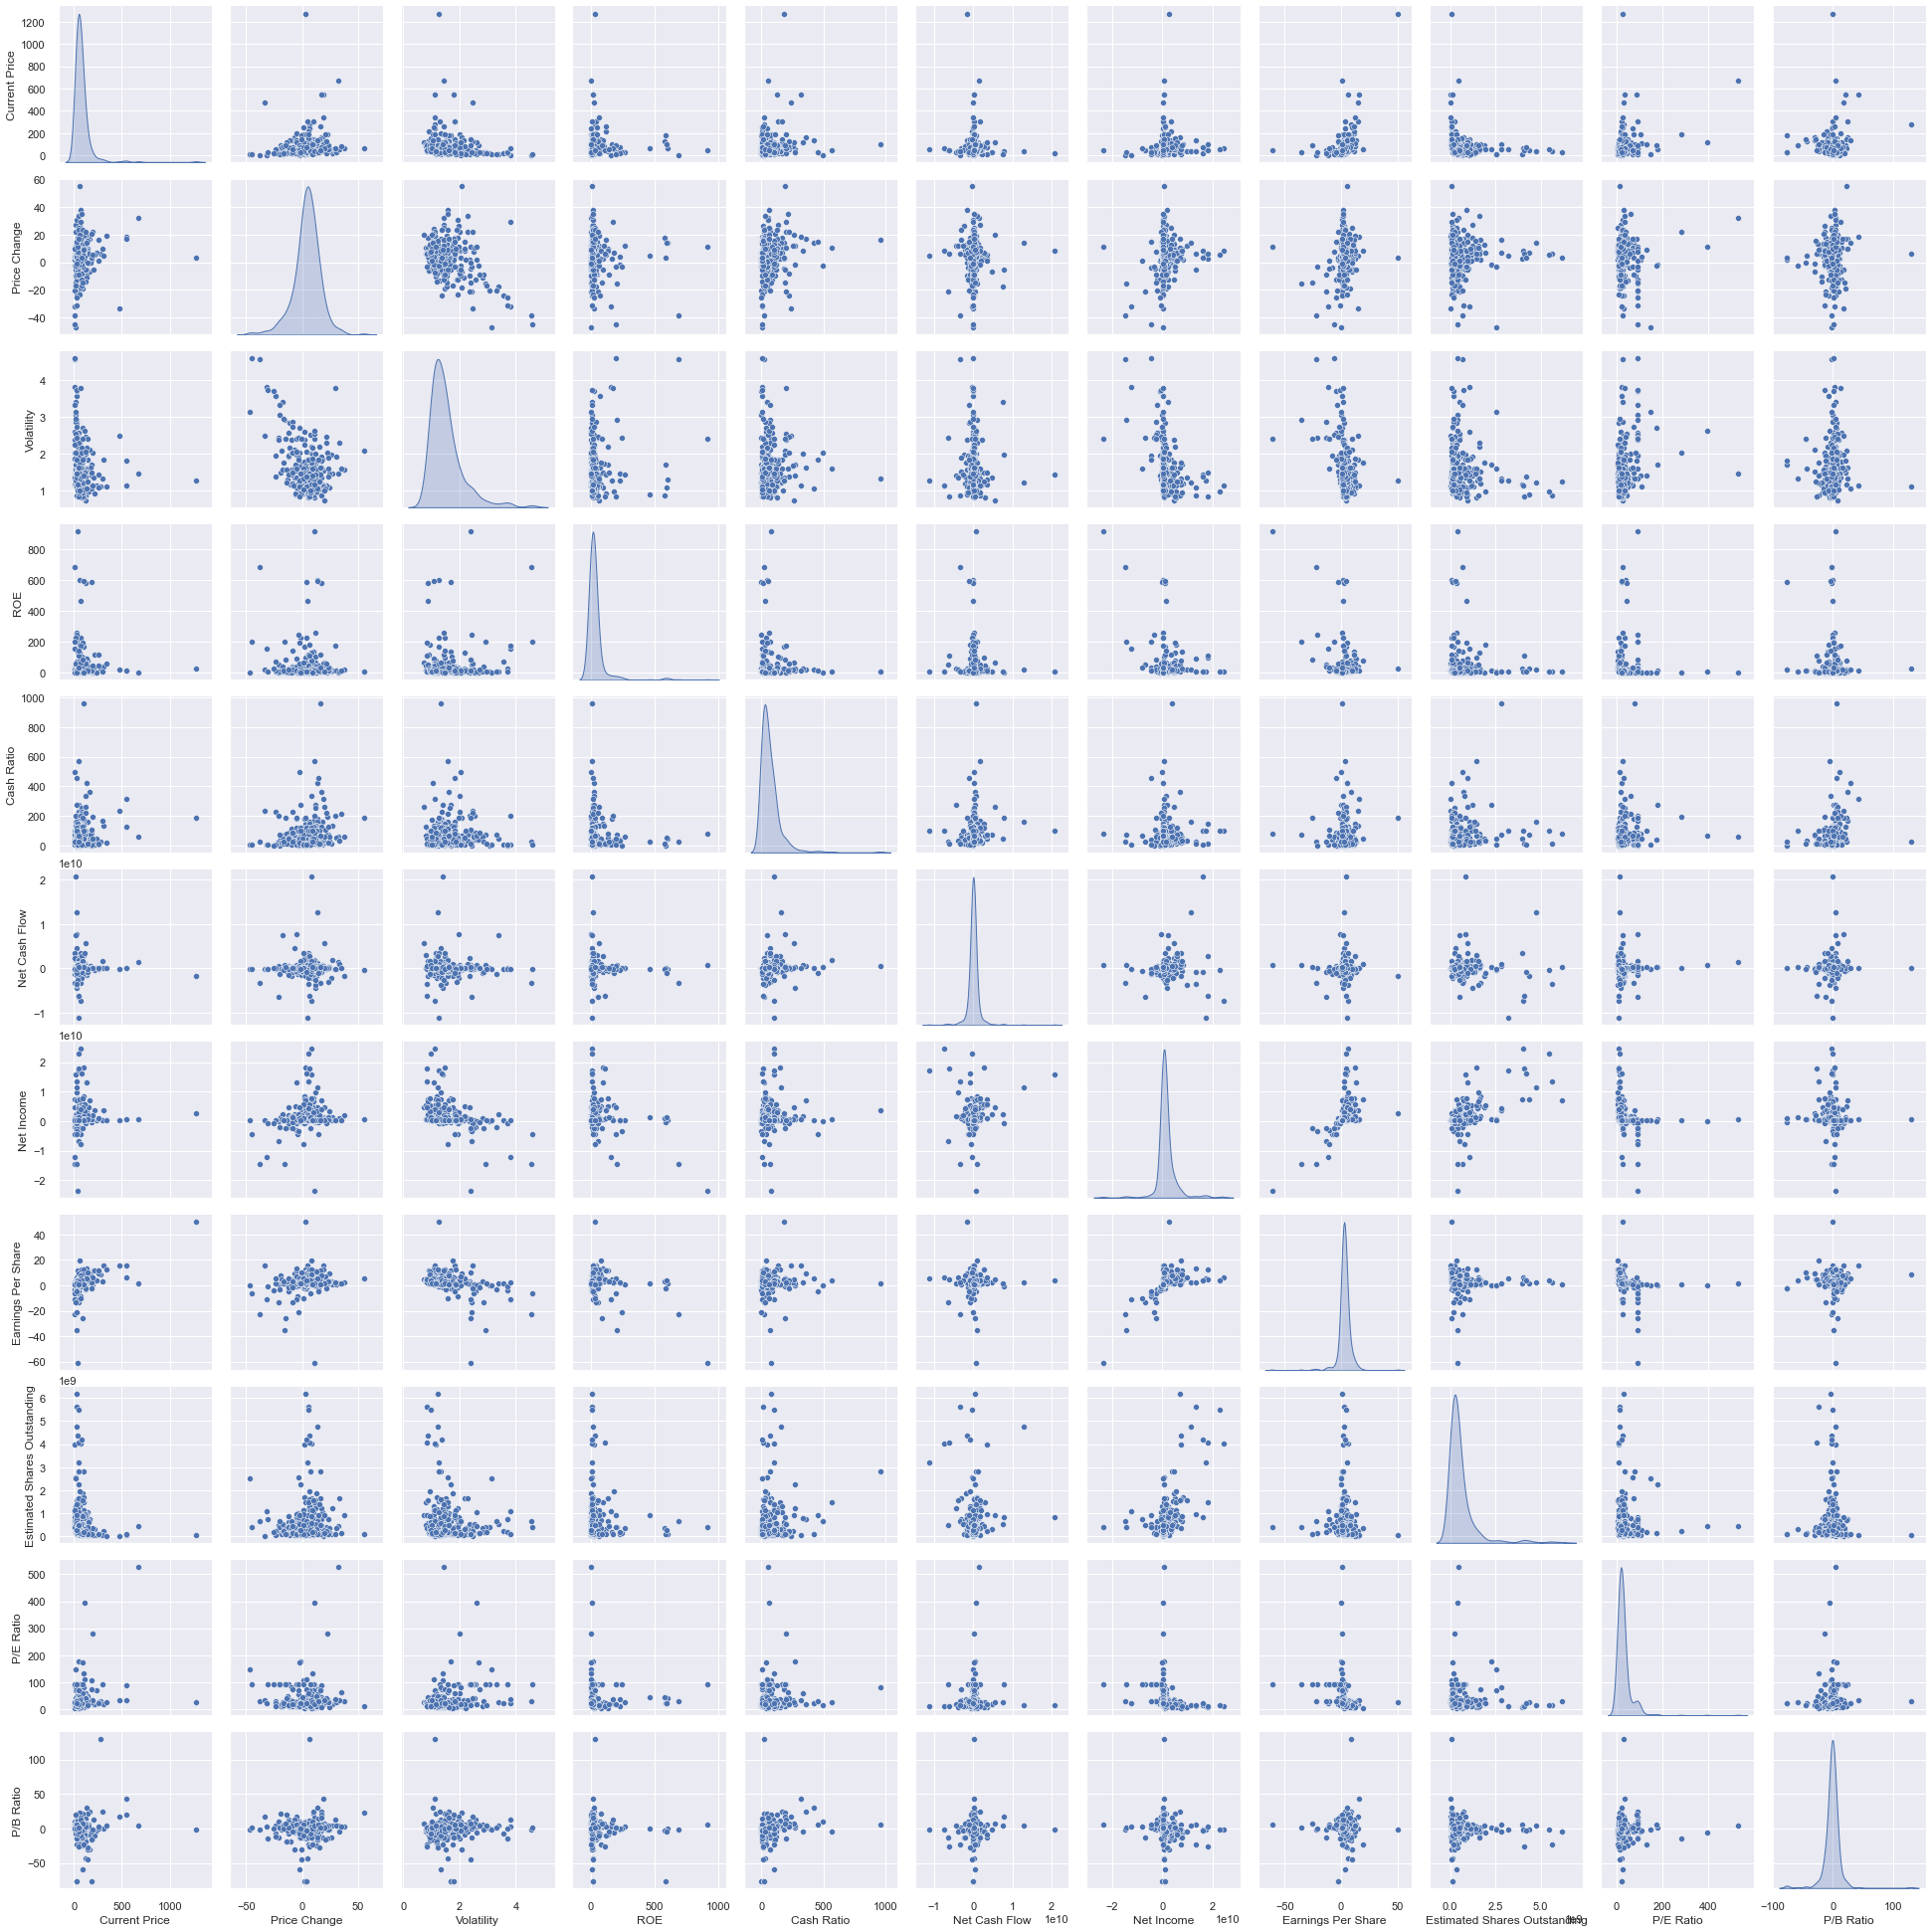

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [354]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()
plt.figure(figsize=(15,8))

**Observations**

- Price change, Net cash Flow, P/B ratio is almost normally distributed.
- Distribution of P/E ratio seems to be bimodal.
- Distribution of Current price seems to be right skewed.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

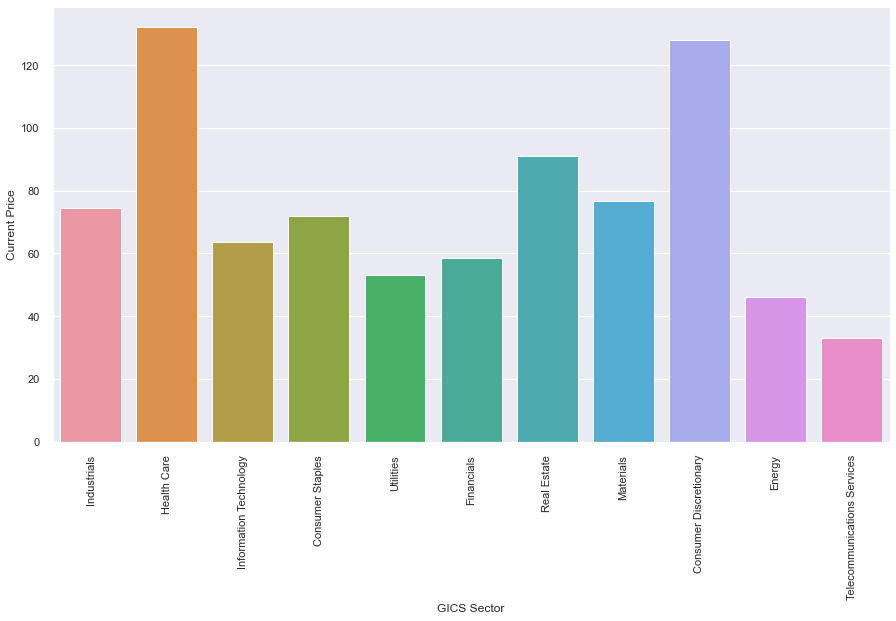

In [355]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Current Price', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

* The current price of stocks in health care sector and consumer Discretionary sector is extremely high while stocks of Telecommunications Services sector and Energy sector are low in current price.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

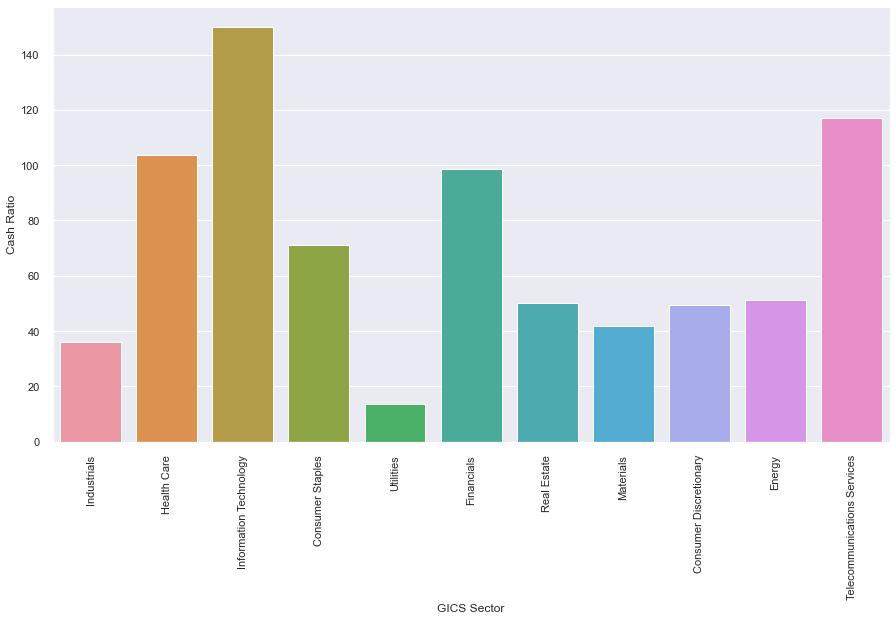

In [356]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

* High cash ratio is observed in securities falling under Information Technology and Telecommunications Services sector while it is low in Utilities sector.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

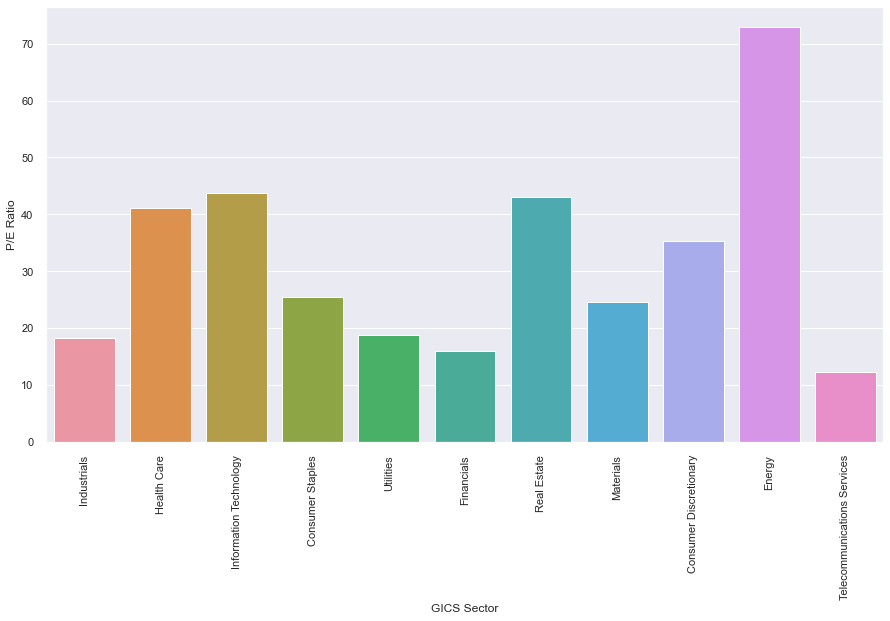

In [357]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

* High P/E Ratio is observed in Energy economic sector indicating that investors are expecting higher earnings growth in this sector.
* Low P/E ratio is observed in Telecommunications services sector indicating either the securities are undervalued or they are doing relatively well as compared to their past trends.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

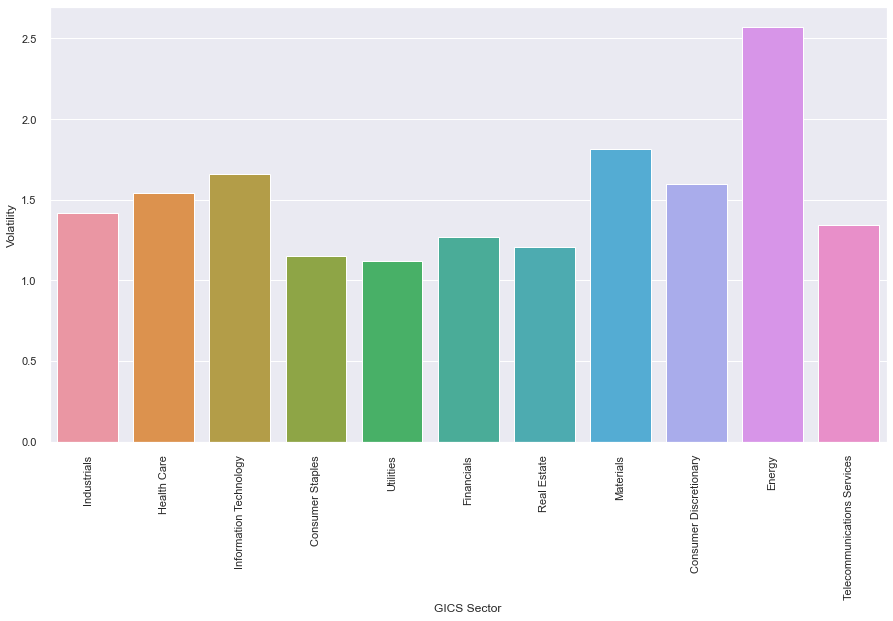

In [358]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

* High volatility is observed in the energy sector which means high risk for the investors. 

<Figure size 1440x1080 with 0 Axes>

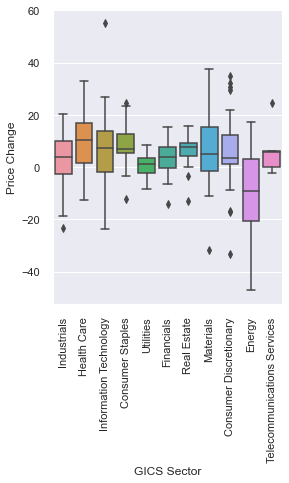

In [359]:
# Write the code here
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='Price Change', data=df, kind="box")
plt.xticks(rotation=90)
plt.show();

* On an average the price change is high for health care sector and low for Energy sector

<Figure size 1440x1080 with 0 Axes>

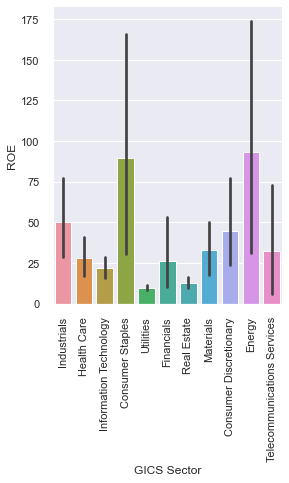

In [360]:
# Write the code here
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='ROE', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show();

* Securities under energy sector have higher ROE indicating effectiveness of the security in generating profit from its existing assets.


<Figure size 1440x1080 with 0 Axes>

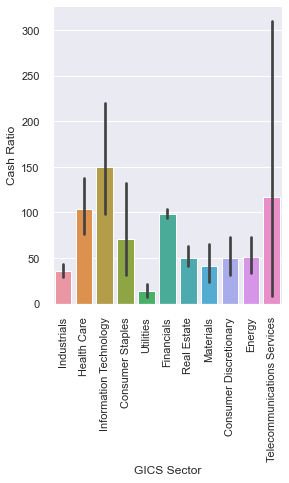

In [361]:
# Write the code here
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='Cash Ratio', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show();

* Cash ratio is high in Information Technology sector indicating the ability of the securities/companies to payoff current debts as they come due

<Figure size 1440x1080 with 0 Axes>

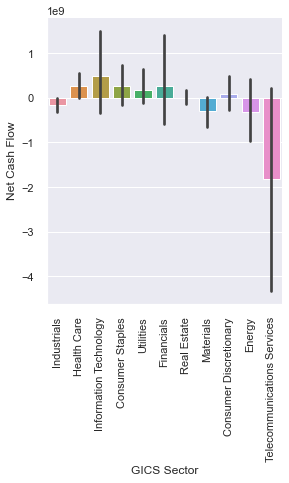

In [362]:
# Write the code here
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='Net Cash Flow', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show();

* Securities under Information Technology sector have high net cash flow which is a good sign for a performing company

<Figure size 1440x1080 with 0 Axes>

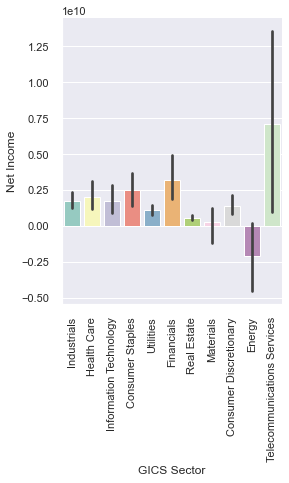

In [363]:
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='Net Income', data=df, kind="bar",palette='Set3')
plt.xticks(rotation=90)
plt.show();

**observation**
* The net income for all the economic sectors is positive except for the Energy sector indicating the risk for traders to purchase stocks from this sector. 

<Figure size 1440x1080 with 0 Axes>

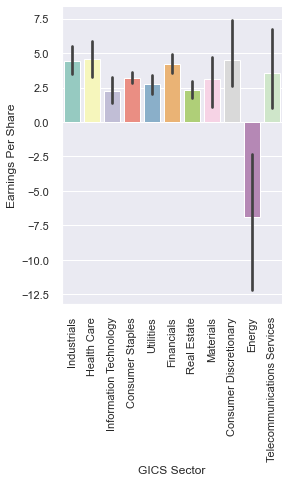

In [364]:
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='Earnings Per Share', data=df, kind="bar",palette='Set3')
plt.xticks(rotation=90)
plt.show();

* The Earnings per share is higher in Healthcare sector and Consumer Discretionary sector favoring the security purchase in this sector considering other financial factors.
* The EPS is low and negative in Energy sector indicating less favorable conditions for the purchase of the securities in this economic sector

<Figure size 1440x1080 with 0 Axes>

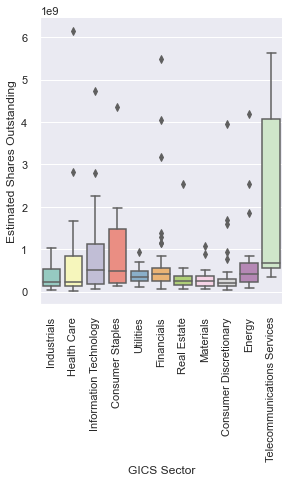

In [365]:
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='Estimated Shares Outstanding', data=df, kind="box",palette='Set3')
plt.xticks(rotation=90)
plt.show();

* Telecommunications Services sector have a higher percentage of estimated shares outstanding

<Figure size 1440x1080 with 0 Axes>

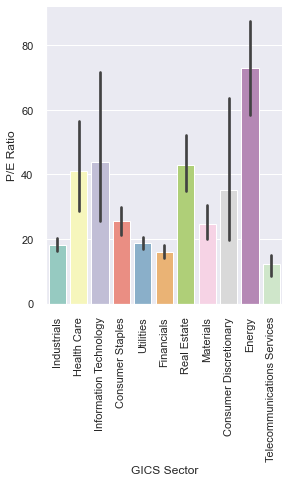

In [366]:
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='P/E Ratio', data=df, kind="bar",palette='Set3')
plt.xticks(rotation=90)
plt.show();

* Energy sector has highest P/E ratio indicating higher expectations in the earning growth in the future

<Figure size 1440x1080 with 0 Axes>

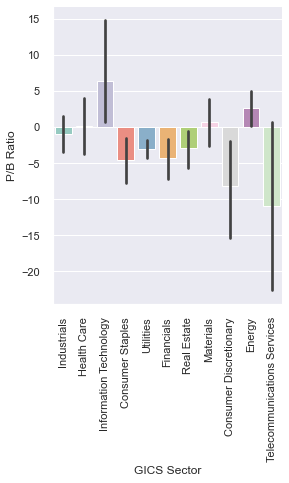

In [367]:
plt.figure(figsize=(20,15))
sns.catplot(x='GICS Sector', y='P/B Ratio', data=df, kind="bar",palette='Set3')
plt.xticks(rotation=90)
plt.show();

* Securities falling under Information Technology sector have high P/B ratio which suggests the securities could be overvalued

#### Obseravations from EDA

* What does the distribution of stock prices look like?
    - The Distrubution of current price is right skewed as observed from the histogram boxplot for current price.
    
* The stocks of which economic sector have seen the maximum price increase on average?
    - On an average the price change is high for health care sector and low for Energy sector
    
* How are the different variables correlated with each other?
    - Net income for securities is moderately positively correlated with the Estimated Shares Outstanding.
    - Net income for securities is moderately positively correlated with Earnings Per Share-
    - Current Price for securities is moderatley positively correlated with Earnings per share
    - P/E Ratio is weakly negatively correlated with Earnings per Share.
    
* Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
    - Cash ratio is high in Information Technology sector indicating the ability of the securities/companies to payoff current debts as they come due

* P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?
    - Energy sector has highest P/E ratio indicating higher expectations in the earning growth in the future while it is lowest for Telecommunications services sector.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier check

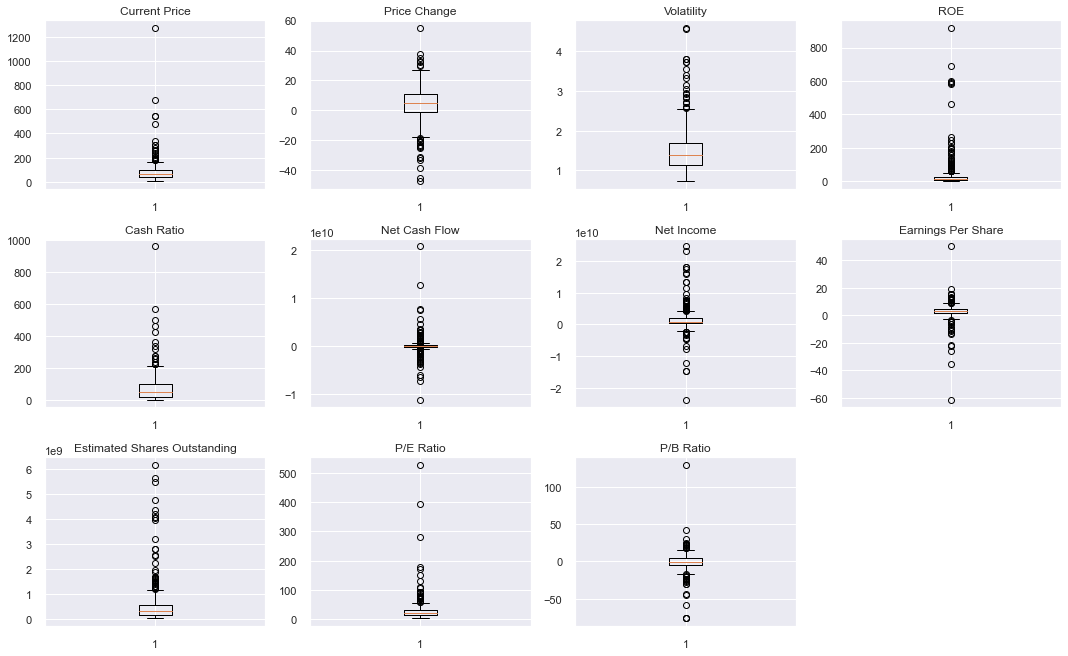

In [368]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
num_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are outliers present in the various numerical columns (financial indicators of the stock market) but we will not treat them as they represent proper values

In [369]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [370]:
subset_scaled

array([[-0.39334123,  0.49394985,  0.2727489 , ...,  0.10786299,
        -0.65248711, -0.50665346],
       [-0.2208372 ,  0.35543891,  1.13704483, ...,  1.25027416,
        -0.31176905, -0.50420469],
       [-0.36719495,  0.6024795 , -0.42700717, ...,  1.09802058,
        -0.39150173,  0.09494078],
       ...,
       [ 0.22191276,  0.43953914, -0.20606693, ..., -0.46005754,
         2.23363447, -1.58938994],
       [-0.54705258, -0.43681096, -0.09781298, ..., -0.37785227,
        -0.22271438,  0.11867997],
       [-0.3364527 ,  1.05104602,  0.14267127, ..., -0.09294161,
         0.85490199,  0.24675384]])

In [371]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [372]:
subset_scaled_df

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
...,...,...,...,...,...,...,...,...,...,...,...
335,-0.486181,0.901646,0.540121,-0.255142,4.308162,-0.559673,-1.487784,-1.127481,0.429111,-0.082116,0.572194
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.167741,-0.337154,-0.152012
337,0.221913,0.439539,-0.206067,-0.400362,0.332009,0.164889,-0.342467,-0.303532,-0.460058,2.233634,-1.589390
338,-0.547053,-0.436811,-0.097813,-0.369243,0.320933,-0.051022,-0.301171,-0.239684,-0.377852,-0.222714,0.118680


## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1823433351932846
Number of Clusters: 5 	Average Distortion: 2.137266844164747
Number of Clusters: 6 	Average Distortion: 2.0593432449479536
Number of Clusters: 7 	Average Distortion: 2.0286796907503737
Number of Clusters: 8 	Average Distortion: 1.9761566622535407
Number of Clusters: 9 	Average Distortion: 1.9264573140135968
Number of Clusters: 10 	Average Distortion: 1.8590472046583744
Number of Clusters: 11 	Average Distortion: 1.817962861642915
Number of Clusters: 12 	Average Distortion: 1.7586079969423103
Number of Clusters: 13 	Average Distortion: 1.758427953855083
Number of Clusters: 14 	Average Distortion: 1.7045560844922356


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

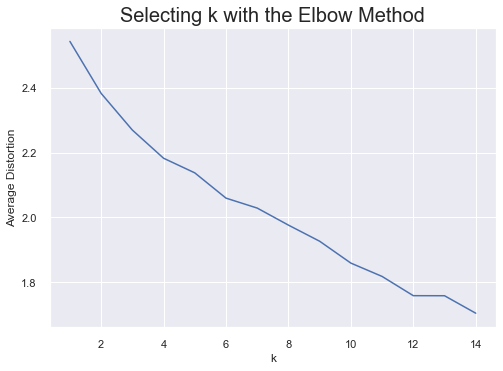

In [373]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 6 or 9.**

### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.45017906939331087
For n_clusters = 5, silhouette score is 0.4177436534711802
For n_clusters = 6, silhouette score is 0.431715627562969
For n_clusters = 7, silhouette score is 0.3977947604666636
For n_clusters = 8, silhouette score is 0.38869050489481416
For n_clusters = 9, silhouette score is 0.10706987439468789
For n_clusters = 10, silhouette score is 0.19635585623092014
For n_clusters = 11, silhouette score is 0.12514176128228605
For n_clusters = 12, silhouette score is 0.16407086760947773
For n_clusters = 13, silhouette score is 0.13338193236820145
For n_clusters = 14, silhouette score is 0.1411799641756245


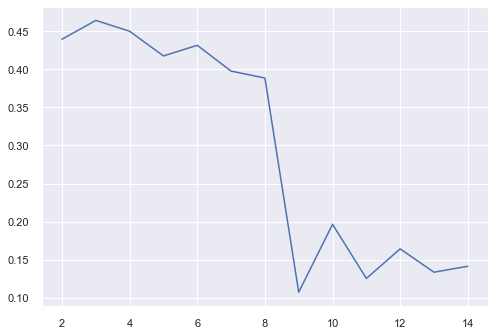

In [374]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the Silhoutee score, it seems that 8 is a good value of k.**

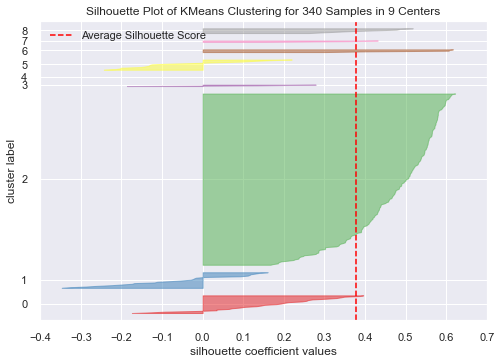

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [375]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

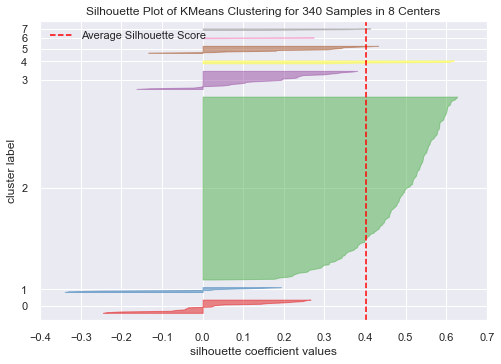

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [376]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

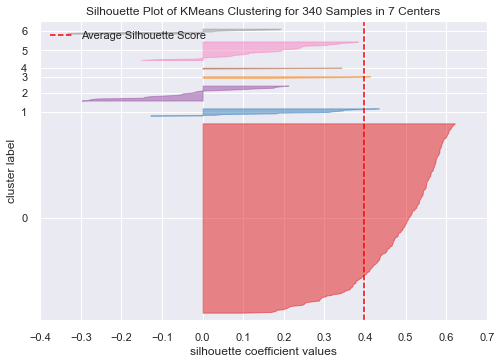

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [377]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

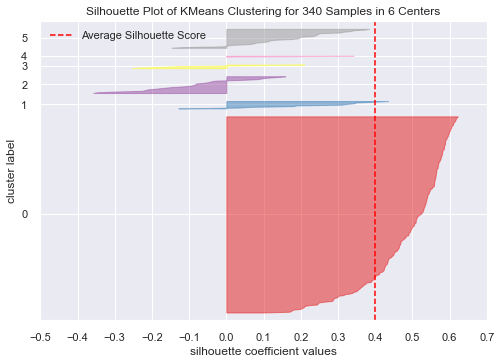

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [378]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

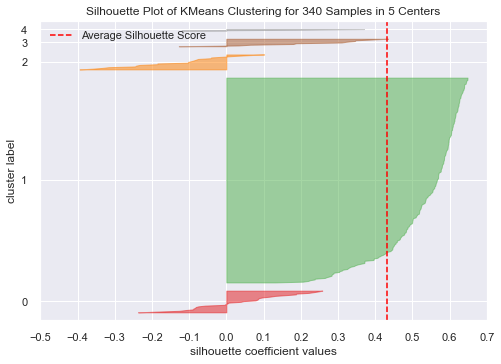

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [379]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

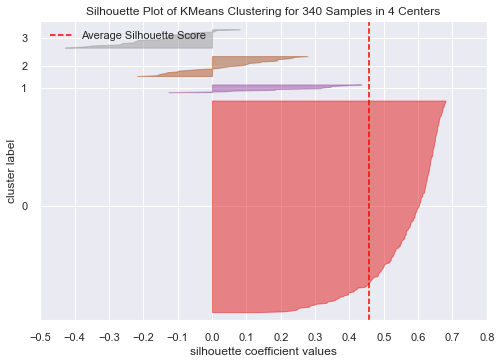

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [380]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

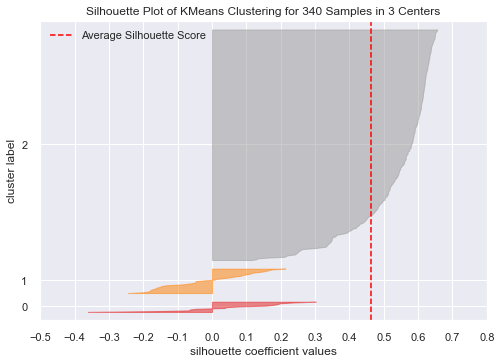

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [381]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Selecting final model

**Let's take 8 as the appropriate no. of clusters as the silhouette score is high enough and there is slight knick at 8 in the elbow curve.**

In [382]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(random_state=0)

In [383]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [384]:
cluster_profile = df.groupby("K_means_segments").mean()

In [385]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Security"].count().values
)

In [386]:
# let's see the names of the countries in each cluster
for cl in df["K_means_segments"].unique():
    print(
        "The",
        df[df["K_means_segments"] == cl]["Security"].nunique(),
        "securities in cluster",
        cl,
        "are:",
    )
    print(df[df["K_means_segments"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 264 securities in cluster 2 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.' 'CF Industries Holdings Inc' '

In [387]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,508.534992,5.732177,1.504640,27.250000,150.875000,37895875.000000,1116994125.000000,15.965000,75654420.935000,43.727459,29.581664,8
1,80.152167,14.571437,1.829679,28.100000,321.850000,625929050.000000,942050500.000000,2.010500,790456335.265000,45.067457,8.307945,20
2,71.419603,4.948894,1.373081,25.337121,51.272727,19976181.818182,1588185079.545455,3.719489,438021401.544886,23.214179,-3.335092,264
3,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27
4,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
5,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
7,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


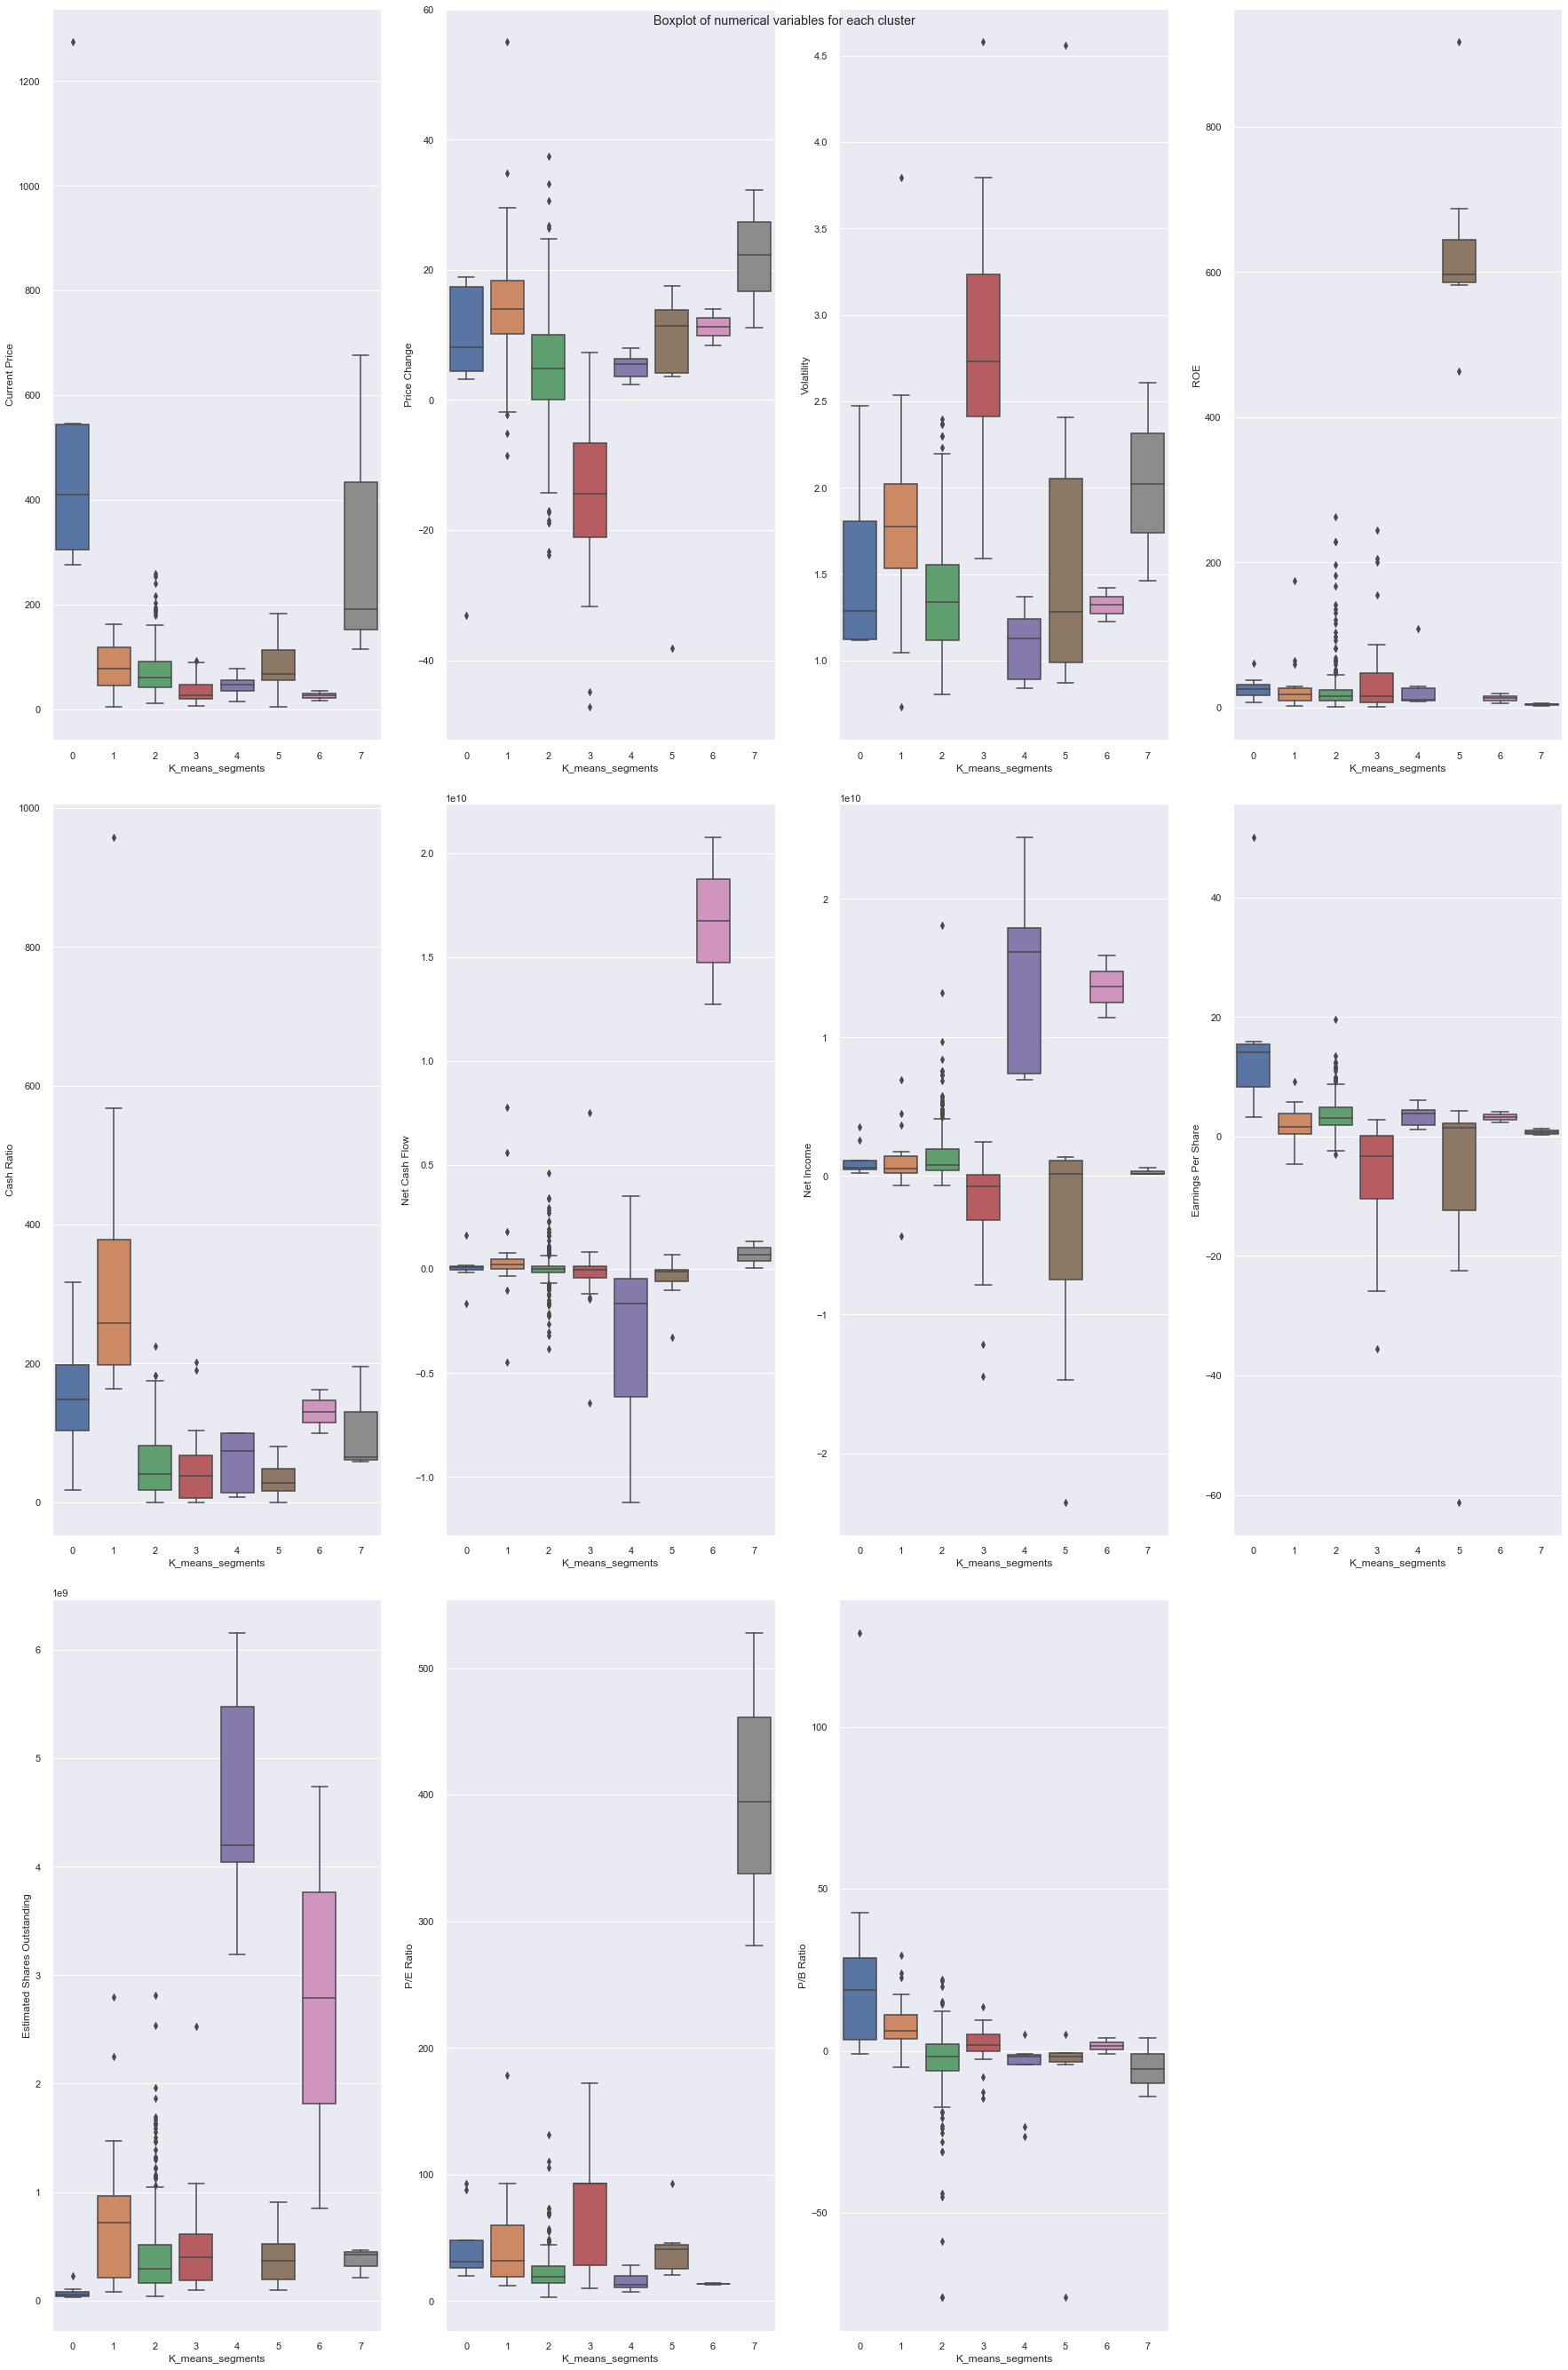

In [388]:
plt.figure(figsize=(25, 50))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

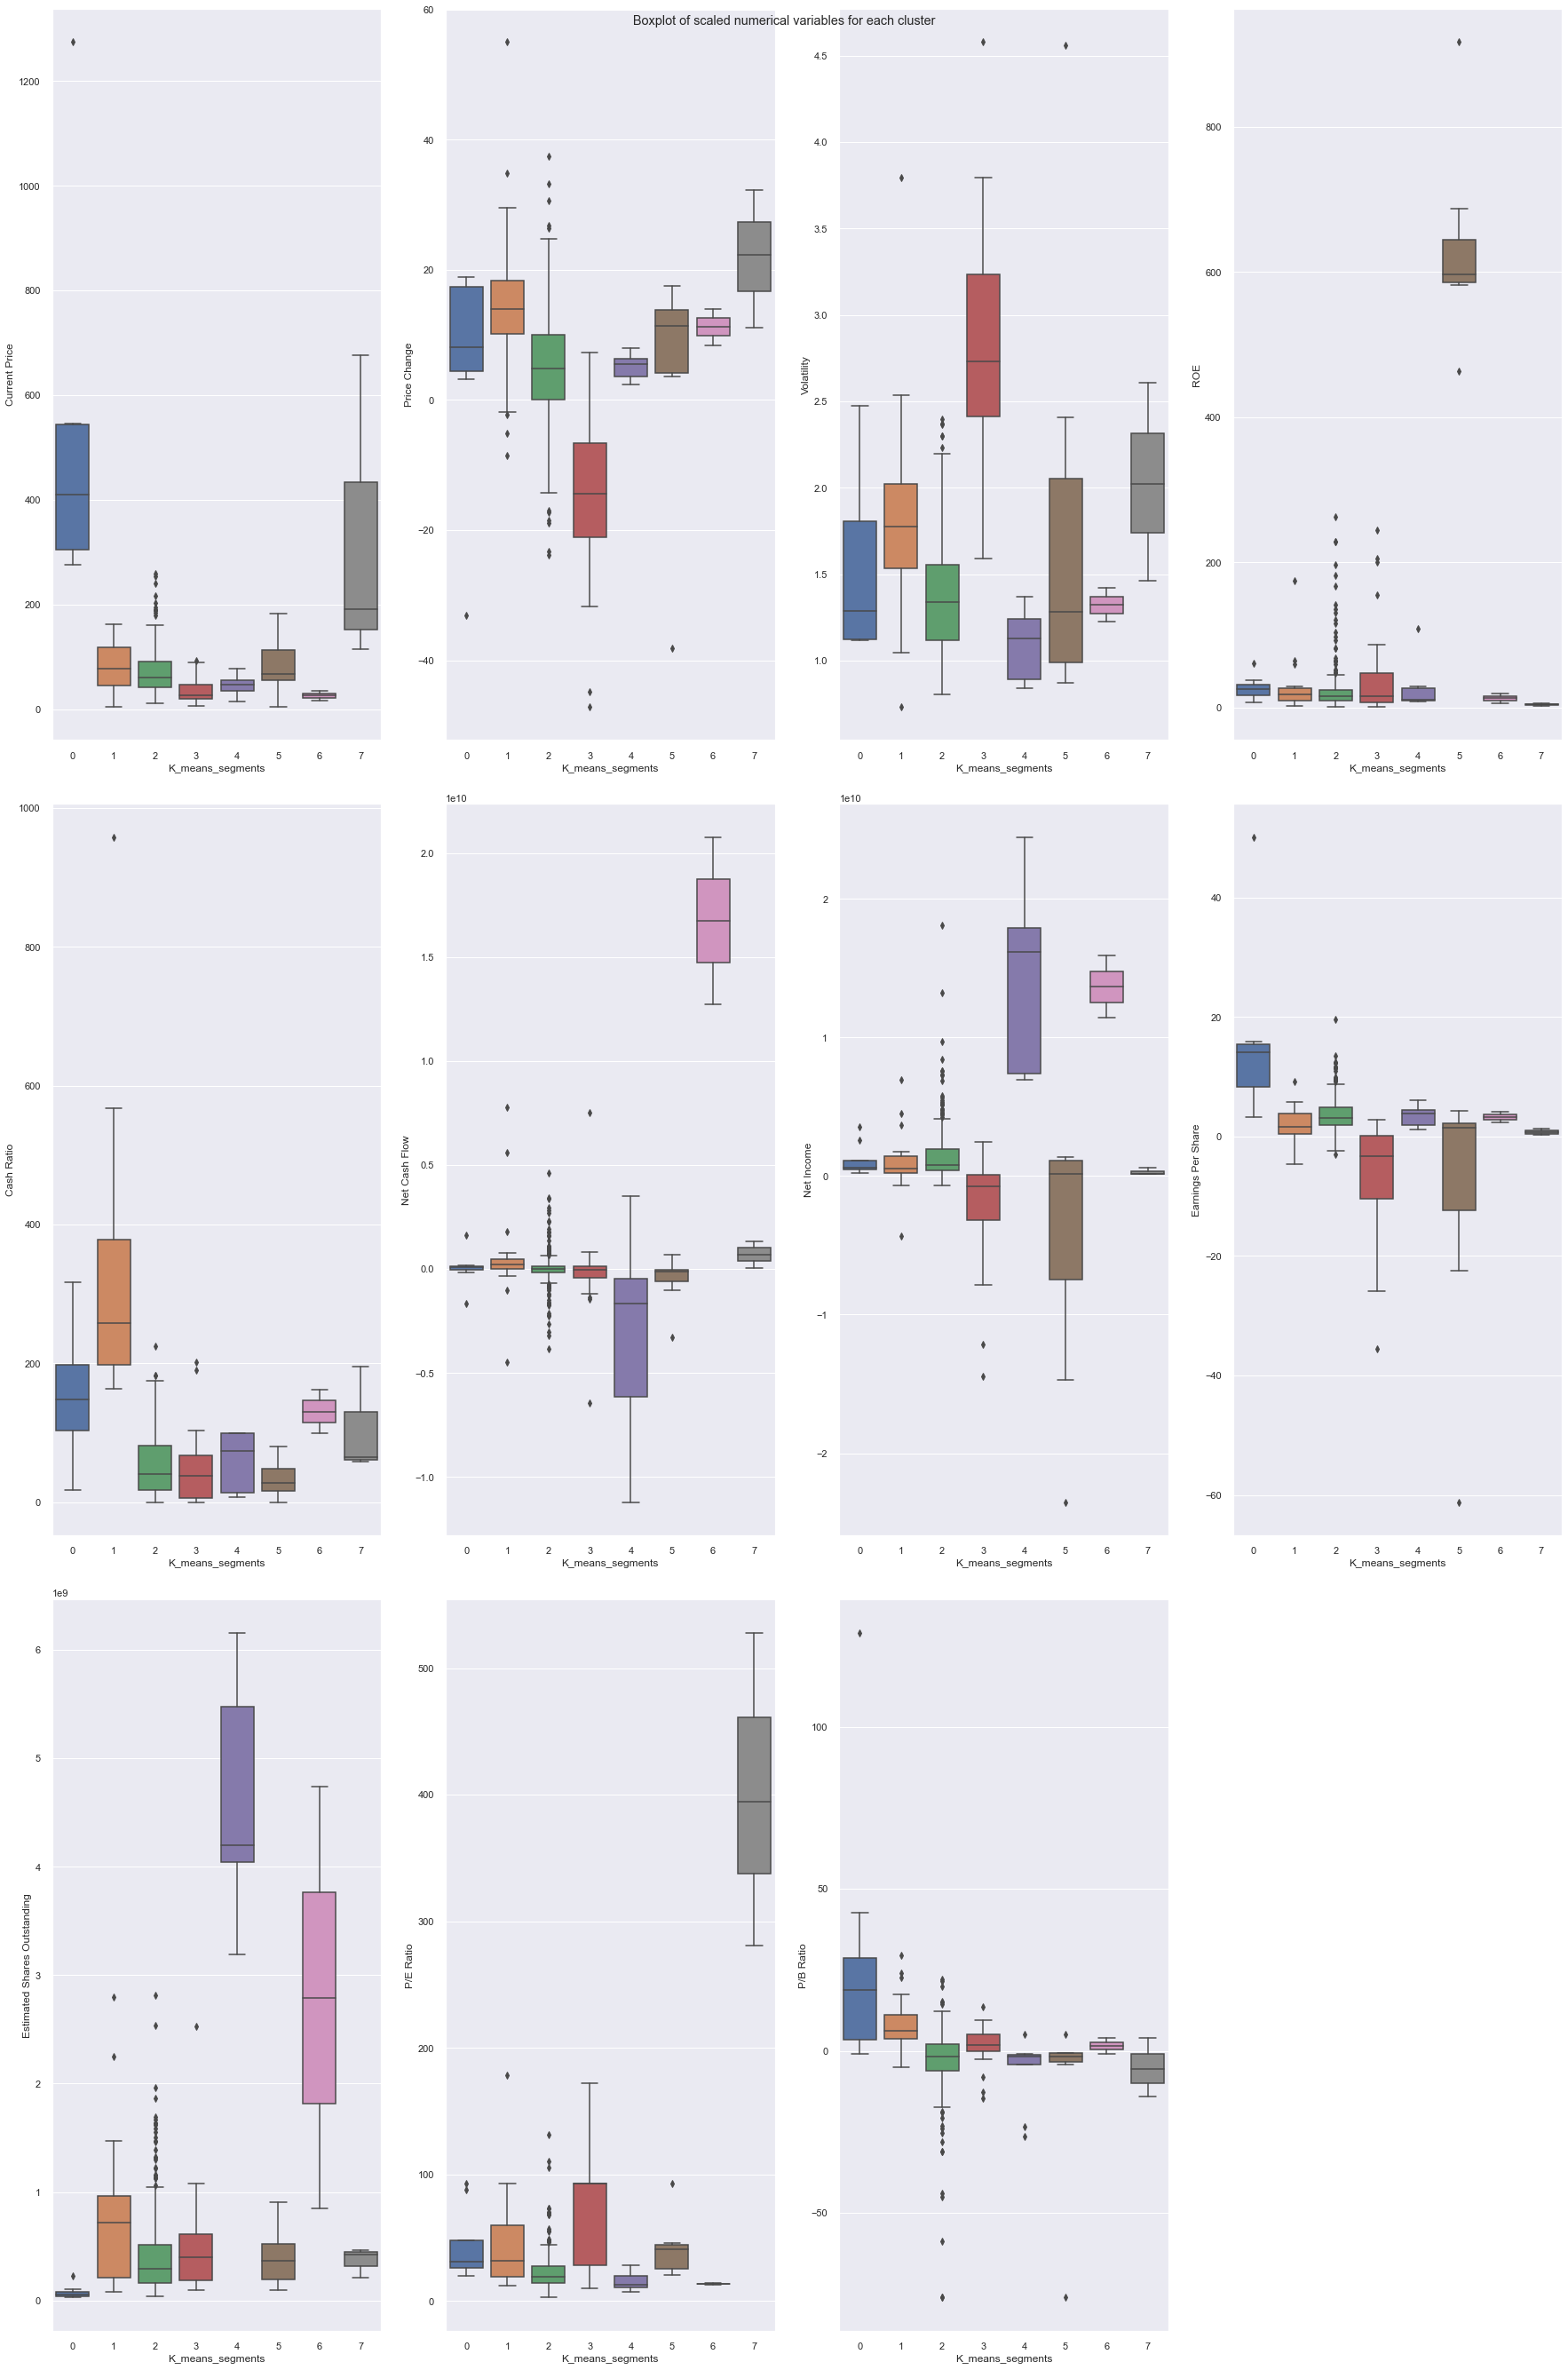

In [389]:
plt.figure(figsize=(25, 50))
plt.suptitle("Boxplot of scaled numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

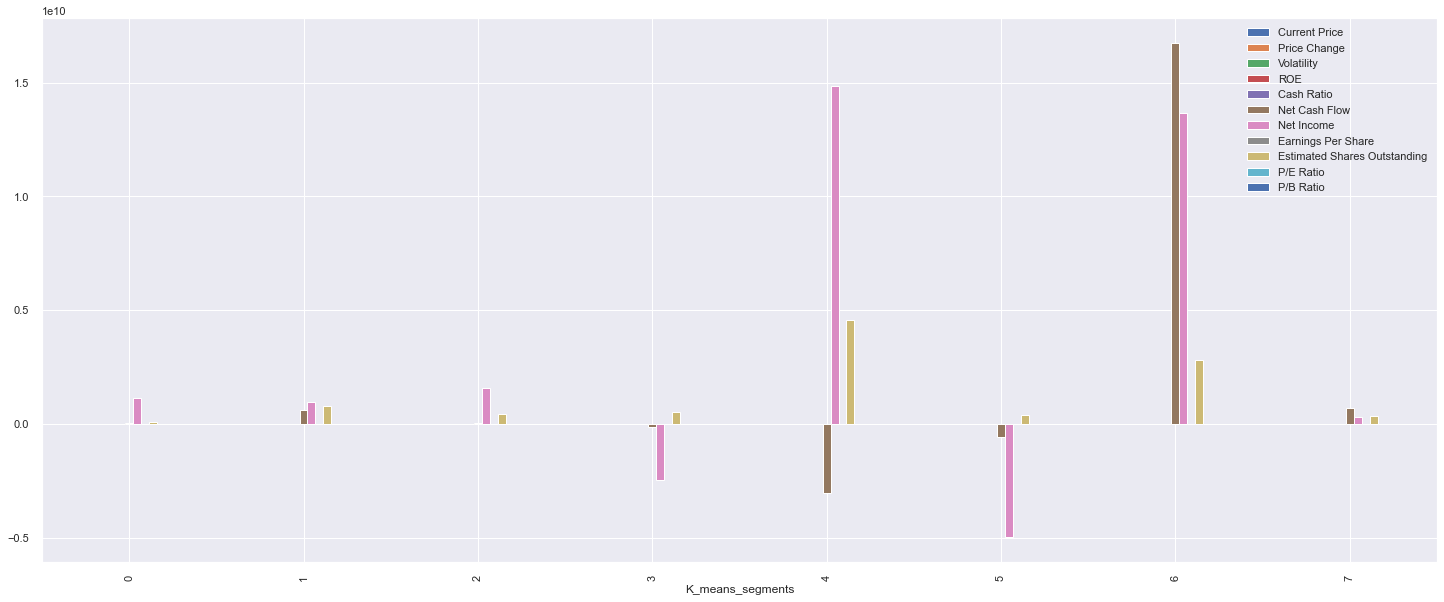

In [390]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(25, 10))

**Insights**

- **Cluster 0**:
    - Current Price are high.
    - Cash Ratio is high for securities.
    - Price change is moderate for securities in this cluster.
    - Earnings per share are very high.
    - P/B ratio are very high.
    - There are only 5 securities in this cluster
   


- **Cluster 1**:
    - Current Price are low to moderate.
    - Volatility is low to moderate for securities in this cluster.
    - Cash Ratio is very low.
    - Earnings per share for securities are moderate.
    - P/B ratio are extremely low for this cluster.


- **Cluster 2**:
    - Price change is moderate to high.
    - Volatitlity range from low to moderate 
    - ROE is very low with few moderate ROE securities
    - Cash ratio is very low
    - Net income is low to moderate
    - P/B ratio is negative with very few high outliers.
    - The number of securities in this cluster is the highest.


- **Cluster 3**:
    - Current price is lowest for stocks in this cluster
    - Volatility is the highest
    - ROE is highest
    - Net Cash Flow is low to moderate.
    - Net income is the lowest for this cluster.


- **Cluster 4**:
    - Volatility is low.
    - ROE is low in this cluster.
    - Net cash flow is on the lower side.
    - Net income is high for this cluster.
    - Estimated shares outstanding are very high.
    
- **Cluster 5**:
    - Current price are low.
    - Price change range from moderate to high for securities in this cluster.
    - Volatility is from low to moderate for securities.
    - Net cash flow is on high side
    - Cash Ratio is moderate to high.
    - Net income is moderate to high.
    - Estimated share outstanding range on low side with few high side outliers


- **Cluster 6**:
    - Price change are on lower end with few low side outliers.
    - Volatitlity range from moderate to high for securities in this cluster.
    - Cash Ratio are very low.
    - Net income is on lower end with few lower end outliers.
    - Estimated shares outstanding are on low side.
    - P/E ratio ranges in the low side.


- **Cluster 7**:
    - Price change are highest for this cluster.
    - Cash ratio range from moderate to high for most securities in this cluster.
    - Net cash flow are moderate.
    - P/E ratio are very high for the securities in this cluster.
    - Estimated shares outstanding are low to moderate.
    - Earnings per share are moderate.
    

**Note:** The graphs and observations provided in the notebook are based on code execution with *sci-kit learn* version "1.0.2". In case a  mismatch between the plots and the associated insights is observed, it may be due to code execution on a different version of *sci-kit learn*, which might have resulted in a swapping of the clusters obtained.

- **Cluster 0**: These are the securities that have  high cash ratio meaning companies with ability to pay current debts, high EPS indicating better profitability. However these stocks have a higher P/B ratio which indicates that the stock could be overvalued. **Investors can invest in this stock after evaluating the exact values of the P/B ratio. Less that 1.0 or sometimes less than 3.0 ratio are good.**

- **Cluster 1**: These are the securities that have low current price ,volatility and P/B ratio indicating the stock is undervalued.EPS is moderate for the stock.**Investors willing to undertake medium risk can invest in this stock.**

- **Cluster 2**: These are the securities that have low cash ratio, low net income, high price change and moderate volatility. These securities dont have more cash on hand and have less revenue. **These stocks indicate high risk with less chances of market gain and are not recommended for purchase to the investors.**

- **Cluster 3**: These are the securities that have high ROE indicating effectiveness of securities in generating profit. However, the net income and net cash flow are low which are unfavorable for the traders. High Volatility indicates higher risks for the traders.**These stocks indicate high risk with less chances of market gain and are not recommended for purchase to the investors.**

- **Cluster 4**: These are the securities for which the net income is high and estimated shares outstanding are very high which can affect price volatility of the stock. They have moderate EPS and low ROE. **These stocks fall under low risk and low gain category.Investors reluctant to take high risk can invest in these securities**

- **Cluster 5**: These are the securities that have low stock price, moderate to high price change, high net cash flow, moderate cash ratio and net income and low estimated share outstanding. High net cash flow indicates a healthy company and moderate cash ratio stating that the securities are good but not best in paying off their debts **These stocks fall under the category of low risk and medium to high gain and can be recommended to the investors.**


- **Cluster 6**: These are the securities that have low price change, moderate to high volatility, low cash ratio, low net income and low estimated shares and P/E ratio.**As most of the quantitative financial indicators are not favorable for the security growth, it is not recommended to invest in these securities.**


- **Cluster 7**: These are the securities that have  high Price change, moderate to high cash ratio, moderate net cash flow, moderate EPS and high P/E ratio. High price change indicates increased demand for the stock and high P/E ratio reflects higher expectations from investors in the earnings growth. As the cash ratio ranges from moderate to high, it indicates that the company is better in paying off its debt. **These securities fall under moderate risk and moderate gain category.**



## Hierarchical Clustering

### Checking Cophenetic Correlation

In [391]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correlation

In [392]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [393]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [394]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

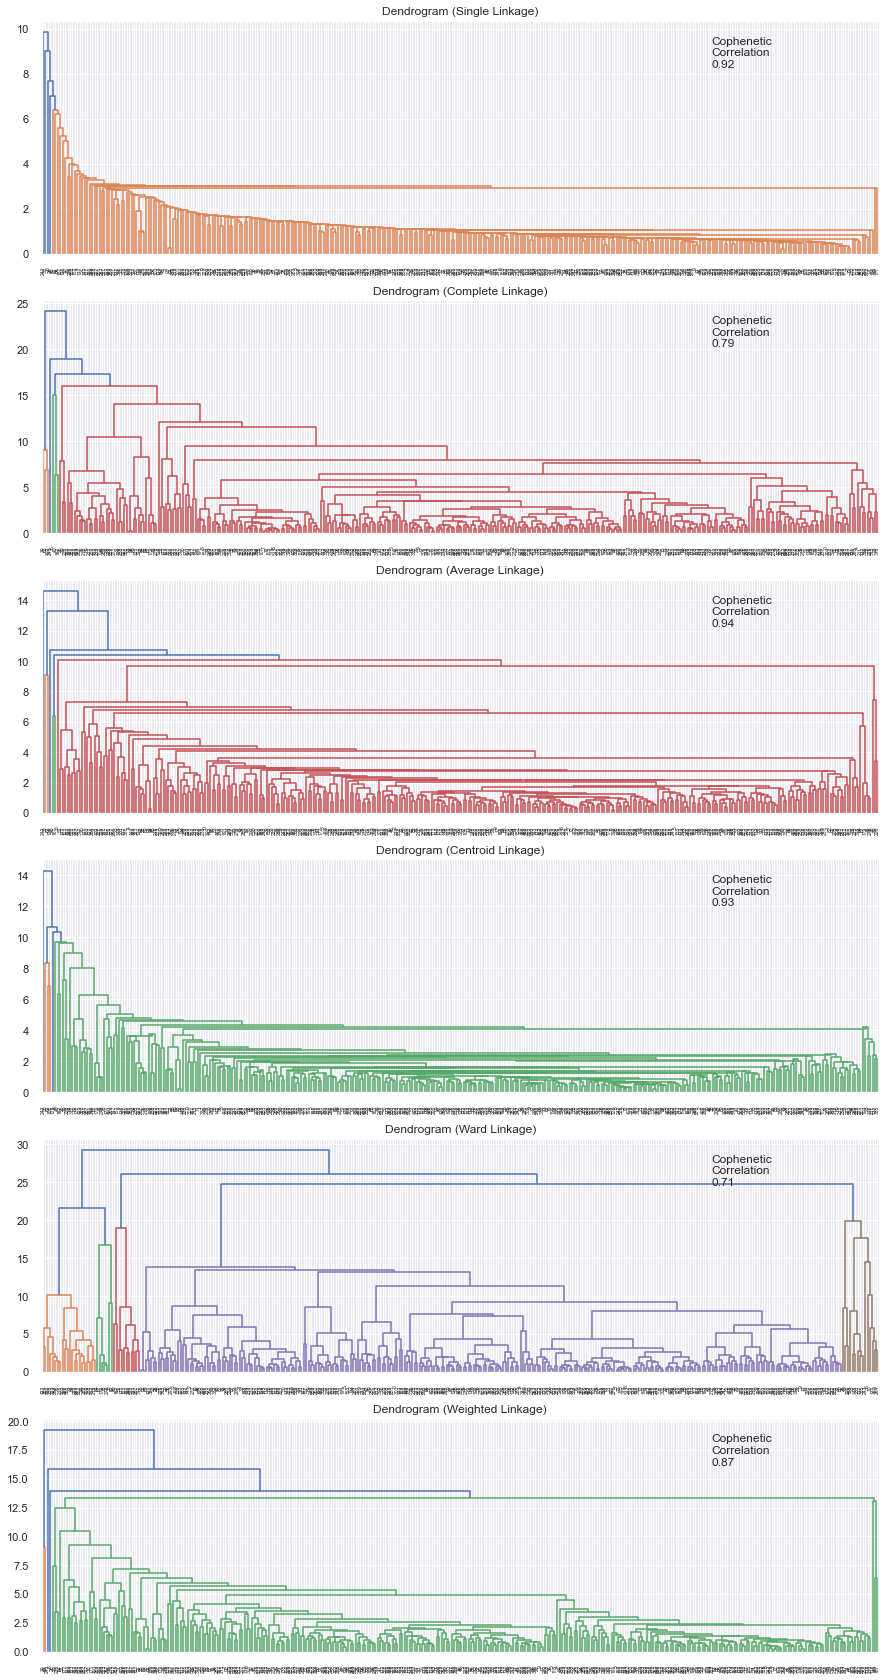

In [395]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* Since the cophenetic correlation is highest for average linkage, we find the optimum number of clusters from the Dendogram for Average linkage

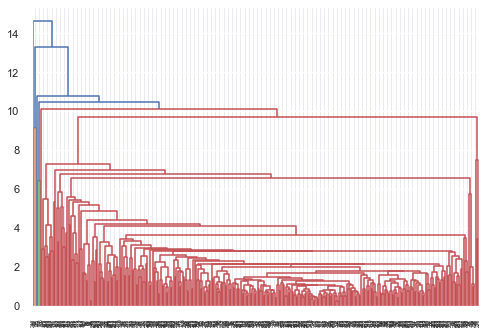

In [396]:
dend=dendrogram(linkage(subset_scaled_df, metric="euclidean", method="average"))

In [397]:
print(dend)

{'icoord': [[15.0, 15.0, 25.0, 25.0], [45.0, 45.0, 55.0, 55.0], [75.0, 75.0, 85.0, 85.0], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [125.0, 125.0, 135.0, 135.0], [145.0, 145.0, 155.0, 155.0], [130.0, 130.0, 150.0, 150.0], [102.5, 102.5, 140.0, 140.0], [80.0, 80.0, 121.25, 121.25], [165.0, 165.0, 175.0, 175.0], [195.0, 195.0, 205.0, 205.0], [185.0, 185.0, 200.0, 200.0], [235.0, 235.0, 245.0, 245.0], [225.0, 225.0, 240.0, 240.0], [215.0, 215.0, 232.5, 232.5], [192.5, 192.5, 223.75, 223.75], [255.0, 255.0, 265.0, 265.0], [275.0, 275.0, 285.0, 285.0], [305.0, 305.0, 315.0, 315.0], [335.0, 335.0, 345.0, 345.0], [325.0, 325.0, 340.0, 340.0], [310.0, 310.0, 332.5, 332.5], [295.0, 295.0, 321.25, 321.25], [365.0, 365.0, 375.0, 375.0], [405.0, 405.0, 415.0, 415.0], [395.0, 395.0, 410.0, 410.0], [385.0, 385.0, 402.5, 402.5], [435.0, 435.0, 445.0, 445.0], [425.0, 425.0, 440.0, 440.0], [393.75, 393.75, 432.5, 432.5], [465.0, 465.0, 475.0, 475.0], [455.0, 455.0, 470.0, 470.0], [485.0

In [398]:
print(dend['color_list'])

['C1', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3

In [399]:
unique_colors = set(dend['color_list'])
print(unique_colors)

{'C2', 'C3', 'C1', 'C0'}


In [400]:
optimal_number_of_clusters = len(unique_colors)-1
print(optimal_number_of_clusters)

3


**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model using sklearn

In [401]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [402]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [403]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [404]:
HCmodel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [405]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

In [406]:
cluster_profile["count_in_each_segments"]

HC_Clusters
0    337
1      1
2      2
Name: count_in_each_segments, dtype: int64

In [407]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "securities in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 337 securities in cluster 0 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc.'
 'The Ban

**We see that there is one cluster of two Securities , one cluster of one security and all other securities are grouped into another cluster. This clustering does not look good as the clusters do not have enough variablility.**

**Let us try using different combinations of  affinity, linkage and number of clusters. After trial and error it was observed that chebyshev affinity and complete linkage for 8 number of clusters results in seperate and distinct clusters. So moving ahead to create the Final model with the above mentioned parameters**

## Creating Final Model

In [408]:
HCmodel = AgglomerativeClustering(n_clusters=8, affinity="chebyshev", linkage="complete")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='chebyshev', linkage='complete', n_clusters=8)

In [409]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [410]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [411]:
HCmodel.labels_

array([0, 0, 0, 6, 2, 0, 4, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 2, 0, 6,
       0, 0, 6, 0, 2, 6, 0, 6, 7, 0, 6, 0, 6, 6, 0, 6, 0, 6, 1, 6, 6, 0,
       0, 6, 6, 6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 6, 0, 0, 6, 6, 0, 0, 0, 6,
       6, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 6, 6, 6, 0, 6, 0, 6, 0, 6,
       6, 6, 6, 6, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 6, 0,
       6, 6, 0, 6, 0, 6, 6, 6, 0, 0, 6, 0, 6, 0, 6, 5, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 6, 6, 0, 6, 6, 0, 6, 6, 6, 6, 6, 6, 0, 0, 6, 0, 6, 6, 0,
       6, 0, 6, 0, 0, 6, 6, 0, 6, 6, 6, 0, 6, 1, 6, 6, 0, 0, 6, 6, 6, 6,
       6, 6, 6, 0, 0, 6, 0, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 6, 6, 6, 6, 6,
       6, 0, 6, 0, 6, 0, 0, 0, 6, 6, 0, 6, 6, 0, 0, 0, 6, 0, 0, 6, 6, 0,
       6, 0, 0, 0, 6, 0, 2, 0, 6, 0, 6, 0, 6, 6, 6, 0, 6, 6, 0, 6, 0, 0,
       6, 3, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 6,
       0, 0, 0, 0, 6, 6, 6, 0, 0, 6, 0, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0,
       6, 6, 0, 0, 6, 6, 0, 0, 6, 6, 6, 6, 6, 6, 0,

In [412]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

In [413]:
cluster_profile["count_in_each_segments"]

HC_Clusters
0    137
1      2
2      4
3      1
4      1
5      1
6    193
7      1
Name: count_in_each_segments, dtype: int64

In [414]:
# let's see the names of the securities in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "securities in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 137 securities in cluster 0 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Akamai Technologies Inc'
 'Alaska Air Group Inc' 'Allegion' 'Applied Materials Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'American Tower Corp A'
 'Anthem Inc.' 'Anadarko Petroleum Corp' 'Arconic Inc' 'Broadcom'
 'American Express Co' 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BorgWarner'
 'Chubb Limited' 'Celgene Corp.' 'CF Industries Holdings Inc'
 'Chesapeake Energy' 'C. H. Robinson Worldwide' 'Charter Communications'
 'Colgate-Palmolive' 'Comerica Inc.' 'CME Group Inc.'
 'Chipotle Mexican Grill' 'Cummins Inc.' 'Cabot Oil & Gas'
 'The Cooper Companies' 'CSX Corp.' 'CVS Health' 'Concho Resources'
 'Delta Air Lines' 'The Walt Disney Company' 'Discovery Communications-A'
 'Discovery Communications-C' 'Devon Energy Corp.' 'eBay Inc.'
 'EOG Resources' 'EQT Corporation' 'Essex Property Trust, Inc.'
 'Edwards Lifesciences' 'Exelon Corp.' 'Expedia Inc.' 'Ford Motor

**Now the clusters seem to have more variability.**

In [415]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,76.754075,-1.836099,1.800651,59.839416,84.189781,274361934.306569,983079131.386861,1.604416,551129351.338175,36.681393,-3.423698,2.189781,137
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,6.000000,2
2,259.085003,15.981070,1.947606,6.500000,147.500000,602460500.000000,389879750.000000,0.640000,837070813.475000,345.354794,-3.726829,5.500000,4
3,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,0.000000,1
4,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,0.000000,1
5,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1.000000,1
6,73.521342,7.848339,1.324333,21.917098,52.725389,-281529196.891192,1871774632.124352,3.709845,561916458.827047,22.926042,-1.254587,2.036269,193
7,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,5.000000,1


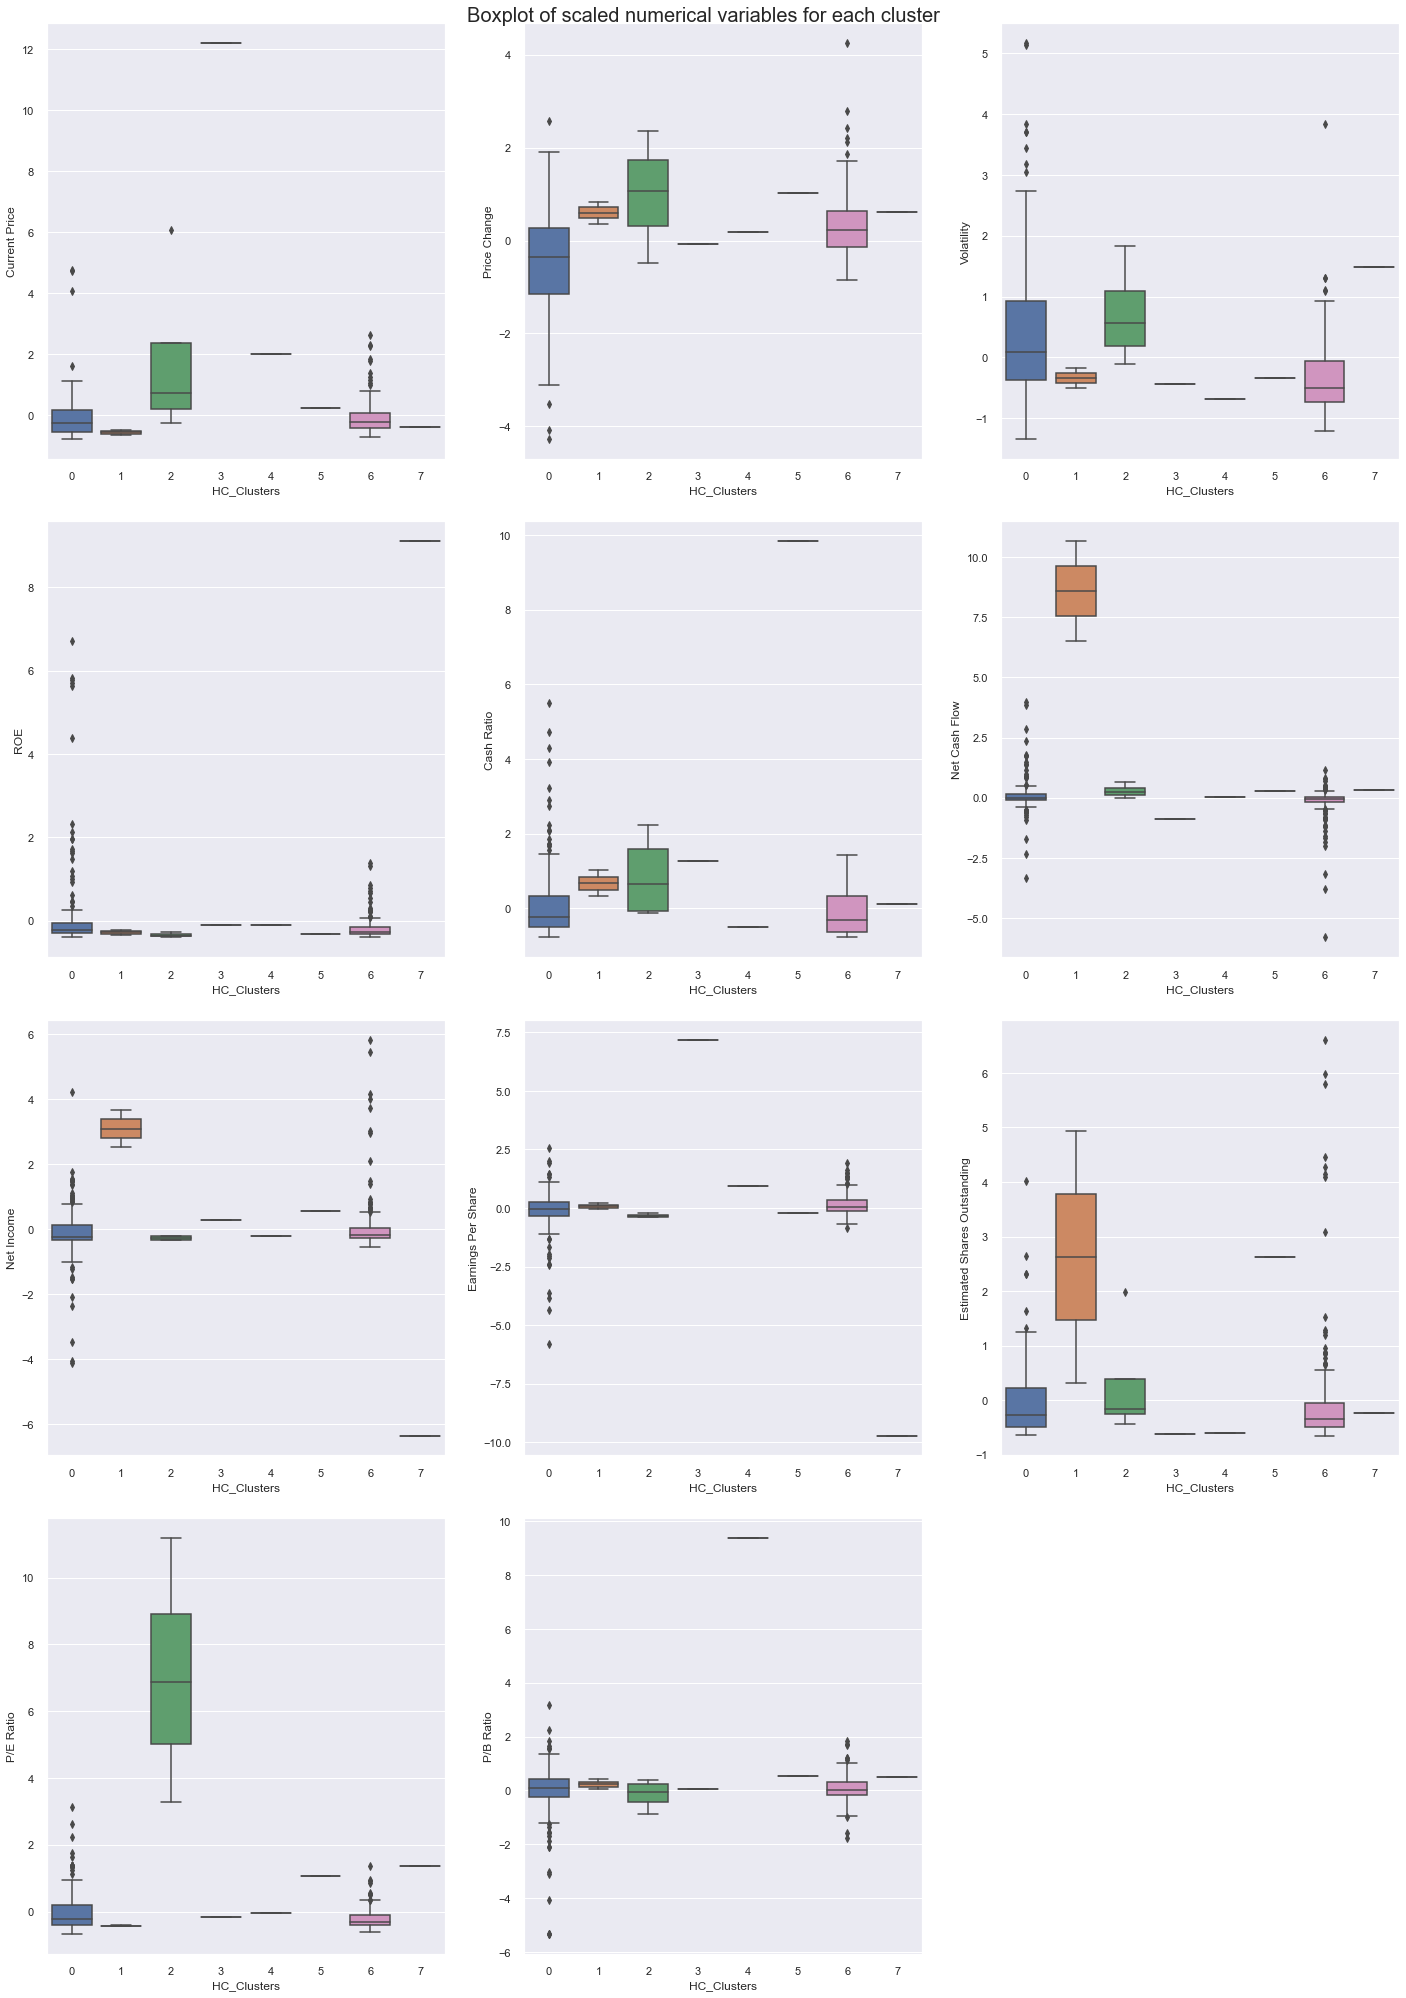

In [416]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

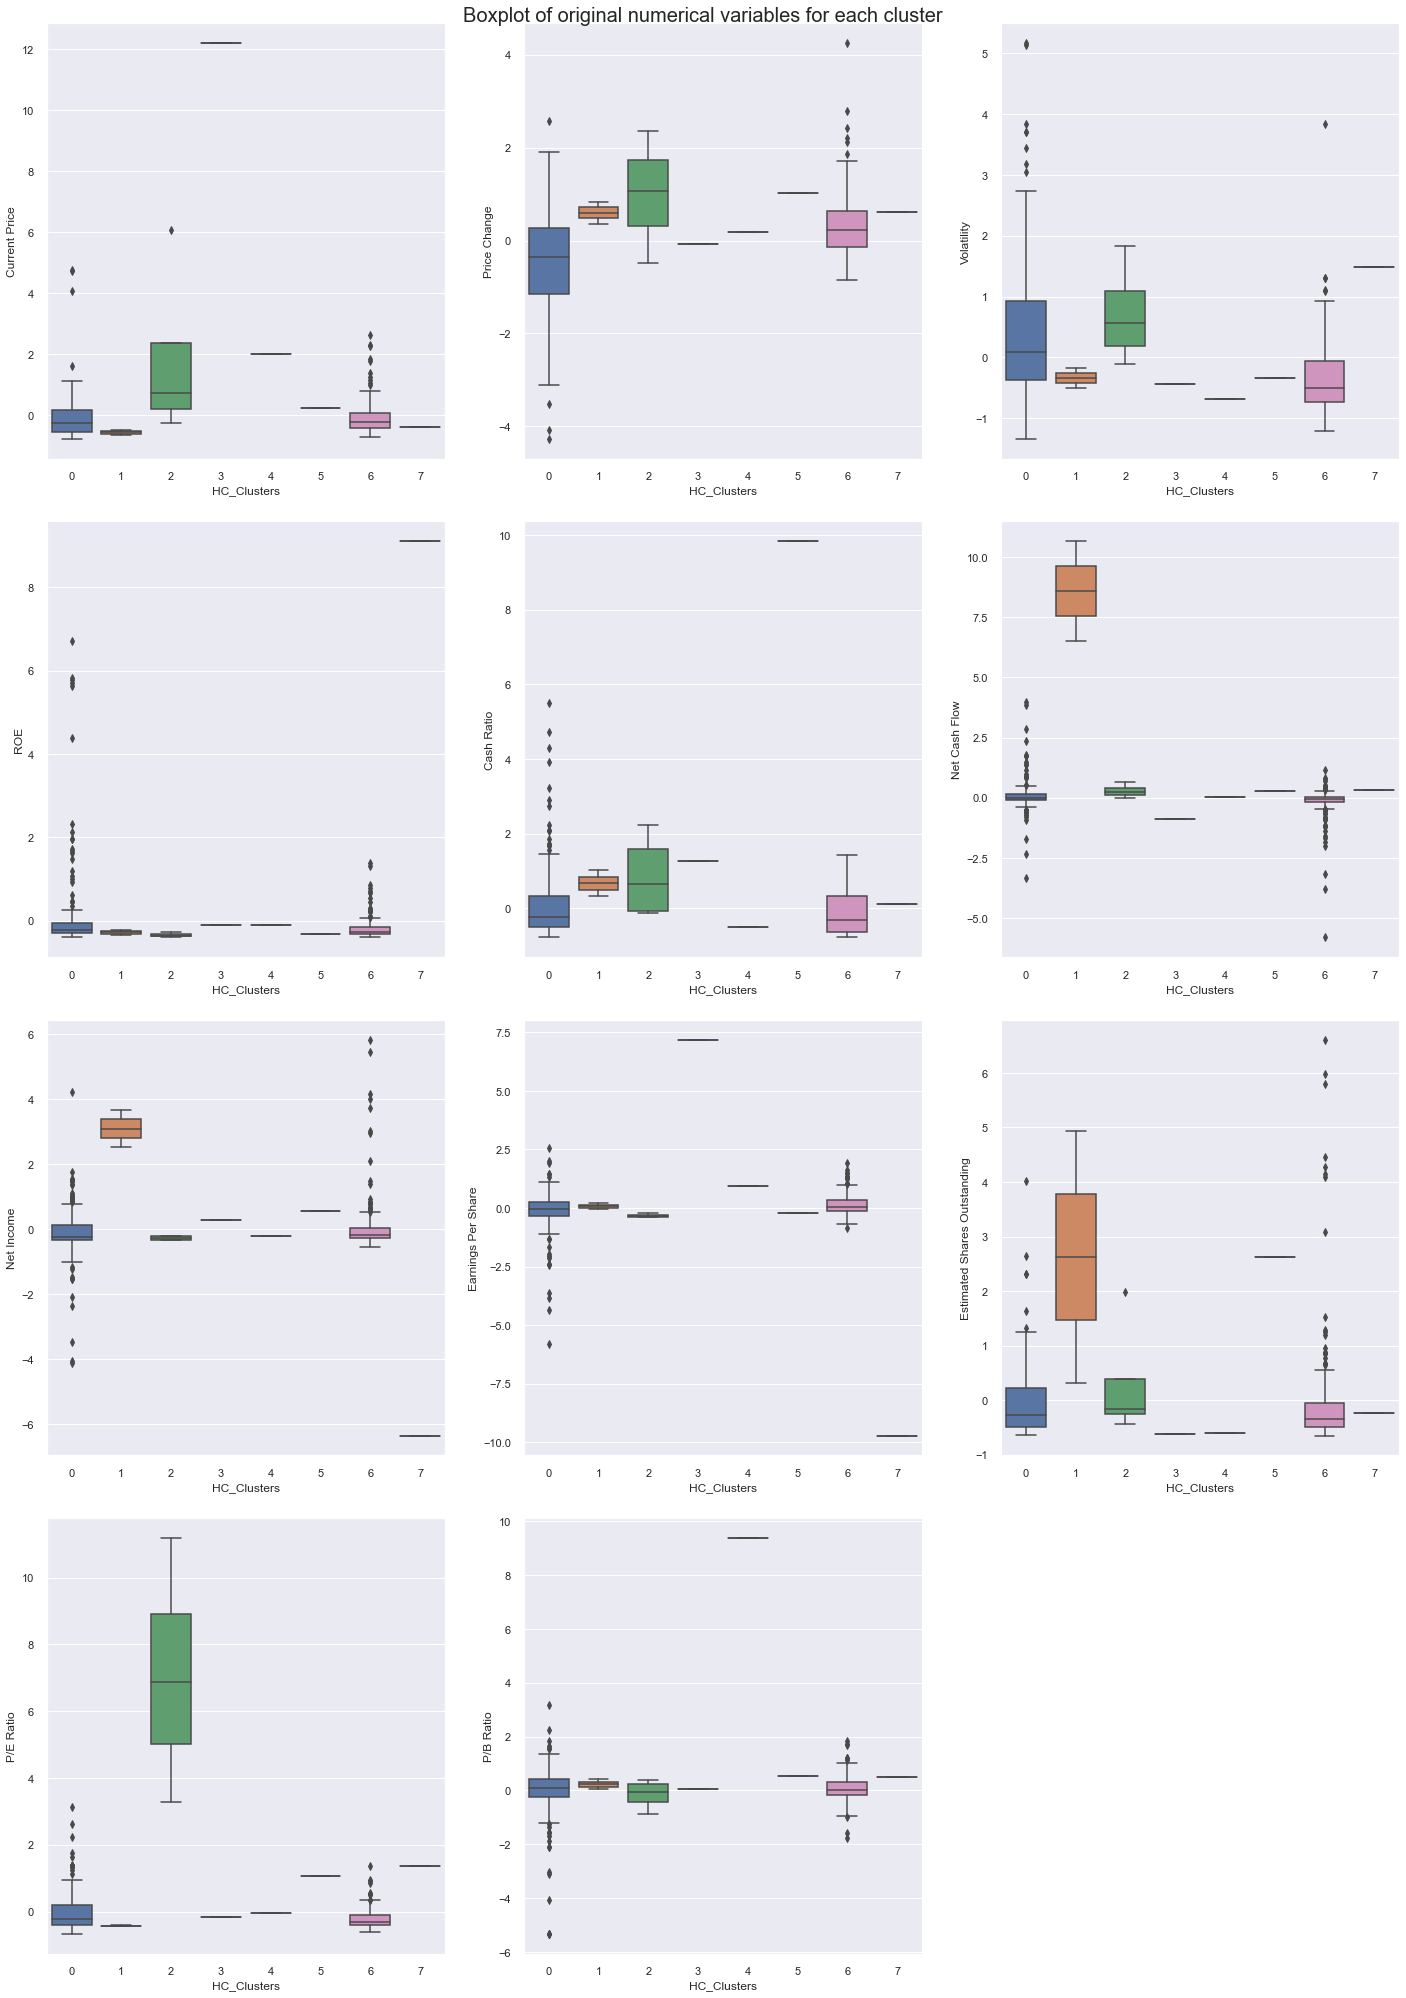

In [417]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Insights

We will look into clusters 6, 0, and 2 only because the other clusters have only 1 or 2 securities in them.

- **Cluster 6**
   - There are 193 securities in this cluster.
   - The current price of the security is low, price change is moderate to high, low volatility.
   - Cash Ratio is low , ROE is low on average with few outliers having moderate ROE and lower net cash flow.
   - Net cash flow is low with few outliers with extremely low Net cash flow.
   - Estimated share outstanding (ESO) is low with few stocks having extremely high ESO
   - EPS is low to moderate and P/B ratio is also low to moderate.
   
   
- **Cluster 0**
   - There are 137 securities in this cluster.
   - The current price of the security is low, price change is moderate to high, Volatility ranges from moderate to high.
   - ROE and cash ratio are low with few outliers on the higher end.
   - The P/E ratio is low and P/B ratio ranges from low to moderate.
   - EPS ranges from moderate with outliers at the high end and low end.
   - Net income ranges from low to moderate.
   
- **Cluster 2**
   - There are 4 securities in this cluster.
   - The current price  of the security is moderate but the price change is moderate to high.
   - Volatility is moderate to high for these stocks
   - P/E ratio ranges from low to high while P/B ratio is moderate
   - Net income and EPS are low while the CAsh ratio is moderate for the securities in these cluster
   

- **Cluster 6**: These are the securities that have low current price, low cash ratio, low volatility, low net cash flow and low to moderate EPS. Low cash ratio indicates lower ability of the security to pay off current debts,low to moderate EPS indicating low to average profitability. Low P/B ratio means the stock is undervalued.**These securities fall under low risk low gain category.Investors reluctant to take high risk can invest in these securities**

- **Cluster 0**: These are the securities that have moderate to high volatility and low current price of the stock. Although the ROE and cash ratio are low in general there are exceptional securities giving higer ROE and higher cash ratio indicating the securities effectiveness in generating profit and ability to pay off current debt respectively. Since the P/E ratio is low it indicates either the securities are undervalued or they are doing relatively well compared to their past trends.**These securities fall under low risk and moderate gain and hence it is advisable to invest in these securities.**

- **Cluster 2**: The current price and volatility of these securities are moderate. These are the securities that have low EPS , Low Net income, Low P/E ratio with moderate P/B ratio indicate that its a risky investment **These stocks indicate high risk with less chances of market gain and hence are not recommended for purchase to the investors.**


## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [418]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [419]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.5825548100987485

- The first two principal components explain 58.2% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

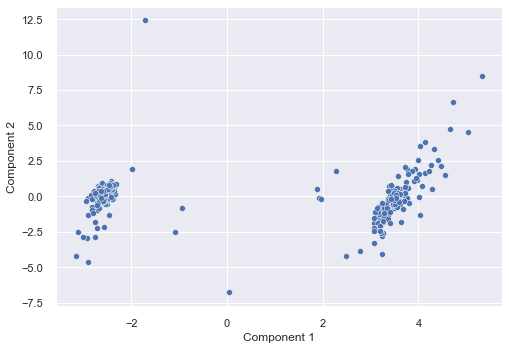

In [420]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- We can kind of see two broad clusters if we draw a Vertical line around x=1.
- There a few outlier points too.

Let's colour the scatterplot by cluster labels.

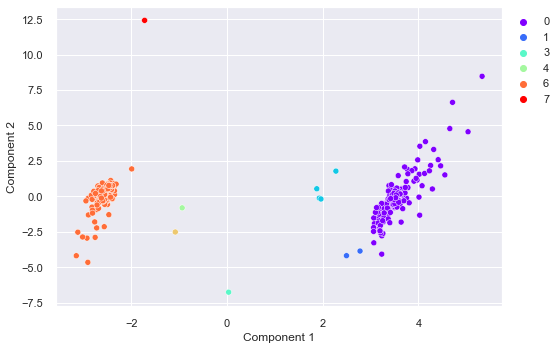

In [421]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 0 and 6 are the major clusters.
- The rest of the data points seem to be mostly outliers.

## K-means vs Hierarchical Clustering


- Which clustering technique took less time for execution?
    - K-Means clustering technique (23 seconds) took less time for execution as compared to hierarchical clustering (1 Min 27 seconds)
    
- Which clustering technique gave you more distinct clusters, or are they the same?
    - There are 8 clusters in both techniques. However, in K-Means clustering technique the securities are grouped heavily in one cluster while in Hierarchical clustering the majority of securities fall under two different clusters.
    
- How many observations are there in the similar clusters of both algorithms?
    - In K-Means clustering technique, there are 8,20,264,27,9,7,2,3 securities in clusters 0 to 7 respectively. 
    - In Hierarchical clustering technique, there are 137,2,4,1,1,1,193,1 securities in clusters 0 to 7 respectively.
    
- How many clusters are obtained as the appropriate number of clusters from both algorithms?
    - In both the clustering techniques 8 number of clusters are found to be appropriate


## Actionable Insights and Recommendations


* The Distrubution of current price is right skewed as observed from the histogram boxplot for current price.
    
* On an average the price change is high for health care sector and low for Energy sector
    
* Net income for securities is moderately positively correlated with the Estimated Shares Outstanding.Net income for securities is moderately positively correlated with Earnings Per Share. Current Price for securities is moderatley positively correlated with Earnings per share. P/E Ratio is weakly negatively correlated with Earnings per Share.
    
* Cash ratio is high in Information Technology sector indicating the ability of the securities/companies to payoff current debts as they come due

* Energy sector has highest P/E ratio indicating higher expectations in the earning growth in the future while it is lowest for Telecommunications services sector.
    
#### Recommendations from K- Means
    
- **Cluster 0**: These are the securities that have  high cash ratio meaning companies with ability to pay current debts, high EPS indicating better profitability. However these stocks have a higher P/B ratio which indicates that the stock could be overvalued. **Investors can invest in this stock after evaluating the exact values of the P/B ratio. Less that 1.0 or sometimes less than 3.0 ratio are good.**

- **Cluster 1**: These are the securities that have low current price ,volatility and P/B ratio indicating the stock is undervalued.EPS is moderate for the stock.**Investors willing to undertake medium risk can invest in this stock.**

- **Cluster 2**: These are the securities that have low cash ratio, low net income, high price change and moderate volatility. These securities dont have more cash on hand and have less revenue. **These stocks indicate high risk with less chances of market gain and are not recommended for purchase to the investors.**

- **Cluster 3**: These are the securities that have high ROE indicating effectiveness of securities in generating profit. However, the net income and net cash flow are low which are unfavorable for the traders. High Volatility indicates higher risks for the traders.**These stocks indicate high risk with less chances of market gain and are not recommended for purchase to the investors.**

- **Cluster 4**: These are the securities for which the net income is high and estimated shares outstanding are very high which can affect price volatility of the stock. They have moderate EPS and low ROE. **These stocks fall under low risk and low gain category.Investors reluctant to take high risk can invest in these securities**

- **Cluster 5**: These are the securities that have low stock price, moderate to high price change, high net cash flow, moderate cash ratio and net income and low estimated share outstanding. High net cash flow indicates a healthy company and moderate cash ratio stating that the securities are good in paying off their debts **These stocks fall under the category of low risk and medium to high gain and can be recommended to the investors.**


- **Cluster 6**: These are the securities that have low price change, moderate to high volatility, low cash ratio, low net income and low estimated shares and P/E ratio.**As most of the quantitative financial indicators are not favorable for the security growth, it is not recommended to invest in these securities.**


- **Cluster 7**: These are the securities that have  high Price change, moderate to high cash ratio, moderate net cash flow, moderate EPS and high P/E ratio. High price change indicates increased demand for the stock and high P/E ratio reflects higher expectations from investors in the earnings growth. As the cash ratio ranges from moderate to high, it indicates that the company is better in paying off its debt. **These securities fall under moderate risk and moderate gain category.**

- **Conclusion on K-Means** : Overall it is recommended to invest in securities falling under cluster 5 as  they have low risk and medium to high gain. 


#### Recommendations from Hierarchical Clustering 

- **Cluster 6**: These are the securities that have low current price, low cash ratio, low volatility, low net cash flow and low to moderate EPS. Low cash ratio indicates lower ability of the security to pay off current debts,low to moderate EPS indicating low to average profitability. Low P/B ratio means the stock is undervalued.**These securities fall under low risk low gain category.Investors reluctant to take high risk can invest in these securities**

- **Cluster 0**: These are the securities that have moderate to high volatility and low current price of the stock. Although the ROE and cash ratio are low in general there are exceptional securities giving higer ROE and higher cash ratio indicating the securities effectiveness in generating profit and ability to pay off current debt respectively. Since the P/E ratio is low it indicates either the securities are undervalued or they are doing relatively well compared to their past trends.**These securities fall under low risk and moderate gain and hence it is advisable to invest in these securities.**

- **Cluster 2**: The current price and volatility of these securities are moderate. These are the securities that have low EPS , Low Net income, Low P/E ratio with moderate P/B ratio indicate that its a risky investment **These stocks indicate high risk with low market gain and hence are not recommended for purchase to the investors.**


- **Conclusion on Hierarchical Clustering** : Overall it is recommended to invest in securities falling under cluster 0 as  they have low risk and medium gain. 